# DS Seminar 20936 - Final Research Report of Recommendation Systems

Name: Omer Hefets

ID: 208786244

---

**Table of contents:**
1. Introduction and explanation about the research
2. Framing the problem and the solution
3. Get the data
4. EDA
5. Data preperation
6. Model selection and basic model training
7. Fine tuning to the best models
8. Presenting the solution
9. Implementing an automatic pipeline for new datasets
10. Summary and conclusions

---

## 1. Introduction

### 1.1 Recommendation Systems

Recommendation systems are important data science models and methods that are being applied in today's biggest companies.

The goal of recommendation systems are algorithms aimed at suggesting relevant items to users, based on past interactions of the users and more information about the items and the users.

In contrast to many machine learning and data science research and topics, recommendation systems have a direct impact on the companies that apply them. Good recommendations result in more sales and more profits for the company.

### 1.2 The goal of this research

As we have learned in this seminar, our main objective is to apply data science in a defined context.

My goal of this research is to apply recommendation systems in a context of a real business problem that exists in the world. For that, I will use a use-case of an imaginary big retail company with many products and an existing database, and I will apply my analysis and all the steps according to this use-case.

### 1.3 The structure of the project

The structure of this project is as follows: 

* **First**, I will analyze the business objective and the goal of the project. 

* **Second**, I will move to describing and exploring the data (EDA) that will be used in the projects. 

* **Then**, I will apply the different recommendation system algorithms while explaining them, and fine-tune the best model. 

* **Afterwards**, I will build an accessible platform (within this notebook) to assess the results of the model, and build a pipleline that will implement all these steps automaticaly on new datasets.

* **At last**, I will present a summary of the conclusions and of more topic and ideas to research on

The main analysis will be made on a single (and rich) database, with the following steps:

1. Framing the problem and the solution
2. Get the data
3. Data preprocessing + EDA
4. Data cleaning + preperation for training
5. Model selection and basic model training
6. Fine tuning to the best models
7. Presenting the solution

---

## 2. Framing the business problem and the solution

### 2.1 The Use-Case

As explained above, the use-case of this research will be the following:

This is a big retail company abroad, that is selling many types of products and has a big database of its existing customers and their actions, and data about the products (will be described as "items") themselves.

Our goal is to help this company apply recommendation systems **to increase the sales and improve the customer experience in the store**.

We will explore the following topics:
1. What is our objective
2. How the solution will be used
3. What are the current solutions - and therefore, our benchmark for improvement
4. How to measure the performance of our algorithms
5. What is our goal of the performance measurement

---

### 2.2 Our objective

By doing research about recommendation systems, we've found that recommendation systems are willing to solve 2 main problems:

1. Given a user, the system should recommend this user the most relevant items that he will be interested in
2. Given a user and an item, the system will predict the rating of this user for this item.

In my perspective, problem (1) can be viewed as a sub-problem of problem (2), and therefore we will focus on problem (2).

Our goal is to train the best model which will result in the most accurate rating system:

$$ f(i, u) = r $$

where

* i = "item"
* u = "user"
* r = "rating"

---

### 2.3 Usage of the solution

The solution will be used to recommend the most rated items for a customer (user) which he hasn't rated.

**The pipeline of the solution is as follows:**

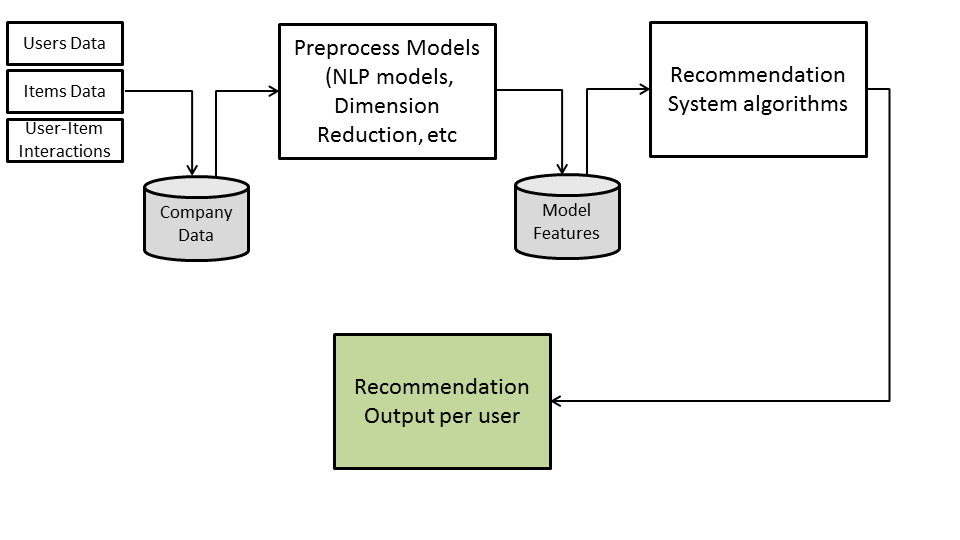

---

### 2.4 The current solution

We will assume that the current solution, and therefore the current benchmark is to give all the unrated items the average possible rating.

For example, if the rating of an item is between 1 and 5, our benchmark will be 3.

---

### 2.5 Measurement of performance

We have learned some metrices to evaluate performance. The main metrices are:
1. Accuracy
2. Recall
3. Precision
4. RMSE
5. MAE

According to the existing literature on modern recommendation systems, RMSE and MAE are the main indicators for performance in these systems.

That is because evaluating rating is with ordinal properties, and mistakes needs to be valued by the distance between the prediction and the true value.

The main difference between RMSE and MAE are that RMSE penalizes large errors (because of the squared error), so that the system will prefer more small errors rather then less big errors.

We will choose **the RMSE measurement since our business objective is to make the smallest error for each item independently**.

### 2.6 Goal of measurement performance

As described, RMSE measures the standard deviation of the errors the system makes in the predictions.

If we assume that the errors of the system distribute normally (which we will be able to check later), according to basic statistics of normal distribution probabilities, we can infer that about 68% of the system predictions will fall within the value of the RMSE.

For example, if ratings are between 1-5 and the RMSE measurement is 0.5, for rating prediction of 4 there is 68% percent that the currect rating is in range:

$$ 3.5 \leq r \leq 4.5 $$

Therefore, **we will define a goal of 0.5 RMSE value** for start **as it puts the predicted value between a 1 value range in 68% percent.**

## 3. Getting the Data

### 3.1 Data source and explanation

Although many small datasets for recommendation systems are available, in this project we will use the "Amazon product data" provided by the UCSD and available in this link: http://jmcauley.ucsd.edu/data/amazon/links.html

This database is most suitable for our goal:
1. It has many interactions, users and items
2. It consists many small databases of different products - therefore, it satisfies our main goal which is to build a system that will work with any kind of product

The "Amazon review data" has 24 different product types, in a size of ~150 GB in total.

In this section we will complete the following tasks:
1. Parse the "CSV" file into a pandas DataFrame
2. Tackle the "JSON" file into a pandas DataFrame as well
3. Sample a test set, and put it aside before the EDA and data exploration (the next step)

---

### 3.2 Getting the data for our use-case - and parsing the "csv" file

In our example, we will choose one of the datasets to work with and by analyzing him we will get insights about the process.

We will choose for start the "Video Games" category. This category consists of:
1. 1,324,753 ratings
2. 50,953 products

We chose this database for start because it has a relative small amount of products, for many ratings.

After downloading the files, we are left with 2 types of files:
1. CSV file with the ratings
2. .gz format file with JSON type records

JSON type records are harder to parse, so we will start loading the csv data

Import the required libraries for handling this kind of data:

In [1]:
# import libraries
import pandas as pd
import numpy as np
import json

Read the csv ratings file into a dataframe:

In [2]:
# define the columns of the dataframe based on the documentation
# the datasets consists of rows of: "user-id ; item-id ; rating ; timestamp"
videos_ratings_columns = ["user", "item", "rating", "timestamp"]

# load the dataframe
videos_ratings_df = pd.read_csv("data/amazon_review_data/ratings_Video_Games.csv", 
                               names=videos_ratings_columns)

After loading the dataframe, we will peek into the head of the df before moving to the JSON file:

In [33]:
videos_ratings_df.head(15)

,user,item,rating,timestamp
0,AB9S9279OZ3QO,0078764343,5.0,1373155200
1,A24SSUT5CSW8BH,0078764343,5.0,1377302400
2,AK3V0HEBJMQ7J,0078764343,4.0,1372896000
3,A10BECPH7W8HM7,043933702X,5.0,1404950400
4,A2PRV9OULX1TWP,043933702X,5.0,1386115200
5,AE7GUHCDQQ4UI,043933702X,1.0,1366156800
6,A48ABFDDRMKI8,043933702X,5.0,1374192000
7,A26B0P6K95SIKW,0439339960,3.0,1288569600
8,AZ3UWOC8QSO6C,0439339987,5.0,1366848000
9,A182S3ANC0W7DL,0439342260,4.0,1355875200


The df consists of 4 columns as expected, and **we will explain them and analyze them later on.**

---

### 3.3 Converting the JSON file to DataFrame

After loading the csv, comes the harder part of parsing the compressed .gz file.

We will start **by extracting the .gz file manually**, and then parse the json file.

After the extraction of the .gz file, we will read the json file line by line for further parsing:

In [34]:
with open('data/amazon_review_data/meta_Video_Games.json', 'r') as f:
    videos_metadata_file = f.readlines()

Here comes our first challenge of converting our data to manipulatable form - we will explain this challenge by printing the first line to the screen:

In [5]:
videos_metadata_file[0]

"{'asin': '0078764343', 'description': 'Brand new sealed!', 'price': 37.98, 'imUrl': 'http://ecx.images-amazon.com/images/I/513h6dPbwLL._SY300_.jpg', 'related': {'also_bought': ['B000TI836G', 'B003Q53VZC', 'B00EFFW0HC', 'B003VWGBC0', 'B003O6G5TW', 'B0037LTTRO', 'B002I098JE', 'B008OQTS0U', 'B005EVEODY', 'B008B3AVNE', 'B000PE0HBS', 'B00354NAYG', 'B0050SYPV2', 'B00503E8S2', 'B0050SY77E', 'B0022TNO7S', 'B0056WJA30', 'B0023CBY4E', 'B002SRSQ72', 'B005EZ5GQY', 'B004XACA60', 'B00273Z9WM', 'B004HX1QFY', 'B002I0K50U'], 'bought_together': ['B002I098JE'], 'buy_after_viewing': ['B0050SY5BM', 'B000TI836G', 'B0037LTTRO', 'B002I098JE']}, 'salesRank': {'Video Games': 28655}, 'categories': [['Video Games', 'Xbox 360', 'Games']]}\n"

As we can see above, this JSON format database **is using single-quotes instead of double-quotes for all the parameters and the data. It makes the file unparsable by pandas or json library.**

For example, if we try to load the dictionary presented above we will get the following error:

In [6]:
json.loads(videos_metadata_file[0])

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

And double quotes error raises as expected.

In order to encouter this error, we will take a manual approach in parsing the file, and write a function for that:

In [7]:
# import required for the parsing
import ast

In [8]:
# parsing function for single-quote JSON file seperated by line
def single_quote_json_parser_to_df(json_file_path):
    """Parses a JSON file with single quotes between the parameters to pandas DataFrame
    
    Parameters
    ----------
    json_file_path : str
        The file location
    
    Returns
    -------
    pd.DataFrame
        Pandas DataFrame with all the metadata included
    """
    
    # Empty list for the dicts that will be parsed from the json file
    file_list_of_dicts = []
    
    # Opening the json file
    with open(json_file_path, 'r') as f:
        file_content = f.readlines()
        
    # Saves the lines as dicts with ast.literal_eval function
    for line in file_content:
        file_list_of_dicts.append(ast.literal_eval(line))
        
    # Convert the list of dicts to the DataFrame
    return pd.DataFrame(file_list_of_dicts)

Now we will use our function to parse the json file:

In [9]:
videos_metadata_df = single_quote_json_parser_to_df(json_file_path='data/amazon_review_data/meta_Video_Games.json')

Again, we will take a little peek into our new dataframe head. 

All data manipulations and analysis will be made later on.

In [10]:
videos_metadata_df.head(5)

,asin,description,price,imUrl,related,salesRank,categories,title,brand
0,0078764343,Brand new sealed!,37.98,http://ecx.images-amazon.com/images/I/513h6dPb...,"{'also_bought': ['B000TI836G', 'B003Q53VZC', '...",{'Video Games': 28655},"[[Video Games, Xbox 360, Games]]",NaN,NaN
1,043933702X,In Stock NOW. Eligible for FREE Super Saving ...,23.50,http://ecx.images-amazon.com/images/I/61KKRndV...,"{'also_viewed': ['B000067NP1', '0439573947', '...",{'Video Games': 44080},"[[Video Games, PC, Games]]",NaN,NaN
2,0439339987,Grandma Groupers kelp seeds are missing and wi...,8.95,http://ecx.images-amazon.com/images/I/416QZg89...,"{'also_bought': ['B000314VVU', 'B000PXUOTE', '...",{'Video Games': 49836},"[[Video Games, PC, Games]]",NaN,NaN
3,0439342260,This software is BRAND NEW. Packaging may diff...,NaN,http://ecx.images-amazon.com/images/I/61Wvu-Uj...,{'also_viewed': ['043934302X']},{'Video Games': 49156},"[[Video Games, PC, Games]]",NaN,NaN
4,0439339960,a scholastic clubs fairs cd rom game,NaN,http://ecx.images-amazon.com/images/I/51k3oRCF...,{'also_viewed': ['B00028D7TG']},{'Video Games': 52262},"[[Video Games, PC, Games]]",NaN,NaN


The columns in this DF seems more messy (for example, the "related", "salesRank" and "categories" have sub-fields that will need to be addressed).

We will apply all exploration and changes to the dataframe in the next section (EDA + exploration).

---

### 3.4 Test set Sampling

Before moving on to the EDA and data exploration, we need to sample our test set, put it aside and not look at it until the final evaluation.

That is because conclusions based on the test set will cause "data leakage" - insights we get by looking at the test set, is aimed at improving the performance on the test-set itself.

Therefore, we will now put the test-set aside.

In our project we have 2 sets of data:
1. Ratings (User-Item Interactions)
2. Items metadata

We will elaborate more on these two later, but for now on we will split the test set from our data.

Practically, **we need to take a test set only from our first dataset - the Ratings database.**

That is because **we assume that all items information (items metadata) is known to us, and we can use all items information for user's rating prediction.**

We will use the sklearn function for the train-test split. Later on, we might split the train set to train-validation set, or use K-FOLD instead.

In [3]:
# Import the required split train-test function from sklearn library
from sklearn.model_selection import train_test_split

Sklearn's function samples a percentage of the data and shuffles it randomly. In our example, we don't want to make a completely random split.

That is because **we would like to keep small records for each user rating products, and evaluate ourself on each user.**
E.g. if user 123 rated 100 items, and our train-test split is 20%, we would like to keep 20 items in the test set.

In that way, we might be able to reduce overfitting the data.

We will **use the stratify functionality for that split, and will choose a 80%-20% train-test split of the data.**

We chose that percentage because on one hand, we have a lot of data to work with, but on the other hand, we would like to keep enought data about each user in the test set.

In this scenario (this split percentage), **users with >=5 ratings will have ratings in the test set.**

In [4]:
# Define the split percentage constant
SPLIT_PERCENTAGE = 0.2

# Create a copy of the ratings data
X = videos_ratings_df.copy()

# We will define 'y' as the user only for stratifing purpse. then, we will use the ratings as the real 'y' column
# Using the users as the 'y' column helps us split the data and keep 20% of the rows in the test set for each user
y = X['user']

# using stratify to get data for each user, and random_state (equals meaning of life) for consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=SPLIT_PERCENTAGE, stratify=y, random_state=42)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

We see that we get an error **for having users that rated only a single item.**

For testing purpuses, **we will remove those users (and their ratings) for now and keep only users with 5+ ratings, so that they will have at least one rating in the test set as explained above**.

Later we will check the number of users with only a single rating, and then decided if to add these rows to the train set.

In [5]:
MINIMUM_RATINGS_AMOUNT = 5

# Here we set our ratings dataframe X with only users that rated more than one item
# We use the groupby and count for the implementation
X = X[X.groupby('user').user.transform('count') >= MINIMUM_RATINGS_AMOUNT]

First, we will check how many rows were removed by printing the dataframes shape to the screen and the difference:

In [6]:
print("The original dataframe shape is: " + str(videos_ratings_df.shape))
print("The new dataframe shape without minimum ratings is: " + str(X.shape))
print("The difference is " + str(videos_ratings_df.shape[0] - X.shape[0]) + " rows, which is " +
      str(int(100 * (1 - (X.shape[0] / videos_ratings_df.shape[0])))) + "% of the original dataframe.")

The original dataframe shape is: (1324753, 4)
The new dataframe shape without minimum ratings is: (300003, 4)
The difference is 1024750 rows, which is 77% of the original dataframe.


**We lost more than 3/4 of our data by removing those users!** We will probably have to add them later to the train set to improve performance.

We will perform the split again:

In [7]:
# Define 'y' again on the smaller ratings dataframe
y = X['user']

# using stratify to get data for each user, and random_state (equals meaning of life) for consistency
# We don't need the 'y_train' and 'y_test' because as we explained before, y only used for  stratifing
X_train, X_test, _, _ = train_test_split(X, y, test_size=SPLIT_PERCENTAGE, stratify=y, random_state=42)

We will sample an example to show that split was done correctly:

In [8]:
# View the head of the dataframe to sample an user
X_train.head()

,user,item,rating,timestamp
1240868,A35BKARXRL7XDD,B00DBCAS7E,5.0,1397088000
241655,A1BHXHZHSLYU0P,B0007Z70YM,4.0,1315785600
747078,A2T3KP9PIE5D9Y,B003BVIXWW,5.0,1397260800
760599,ATDXFI4YZRGOM,B003JVCA9Q,4.0,1309996800
90350,A13TO1ZFAH9SVN,B00005N6K3,5.0,1099958400


We will sample the first user with ID 'A35BKARXRL7XDD' for example, and print to the screen how many ratings he has in the train and in the test sets respectively:

In [9]:
USER = "A35BKARXRL7XDD"

print("Amount of ratings in the train dataset for user " + USER + " is " + 
      str(len(X_train.loc[X_train['user'] == 'A35BKARXRL7XDD'])))
print("Amount of ratings in the test dataset for user " + USER + " is " + 
      str(len(X_test.loc[X_test['user'] == 'A35BKARXRL7XDD'])))

Amount of ratings in the train dataset for user A35BKARXRL7XDD is 4
Amount of ratings in the test dataset for user A35BKARXRL7XDD is 1


And as we can see, the split for this example was done as expected.

Before moving on, we will assemble our train set again, and add all ratings with users of 4 or less ratings:

In [10]:
# New df with only 4 or less ratings per user
videos_ratings_less_ratings_df = videos_ratings_df[videos_ratings_df.groupby('user').user.transform('count') < MINIMUM_RATINGS_AMOUNT]

Concating this new dataframe to the existing X_train dataframe:

In [11]:
X_train = pd.concat([X_train, videos_ratings_less_ratings_df], ignore_index=True)

We will Validate that now 'X_train' and 'X_test' together produce the same amount of ratings as the original DF:

In [12]:
print("The difference between the new train and test and the original df is: " + 
      str((X_train.shape[0] + X_test.shape[0]) - videos_ratings_df.shape[0]) + " columns.")

The difference between the new train and test and the original df is: 0 columns.


And the difference is 0 as required.

---

## 4 Data Preprocessing and EDA

### 4.1 Preprocessing and EDA process explanation

We successfully splitted the train and the test sets, so now we are free to perform basic preprocess for the train set and perform the EDA.

Note: Later on we might need to use some data preprocessing for the test set as well, so we will build functions for that purpose for later usage.

**In this section we will perform the followings steps:**
1. Apply basic data preprocess to prepare the train set for the EDA
2. Study each attribute we have in our datasets and its characteristics:
        a. Name
        b. Type (Categorial / Integer / text / etc.)
        c. % of missing values
        d. Noise of the attribute (outliers)
        e. Usefulness analysis for our task
        f. Data distribution
3. Visualize the data for further insights (continuing the EDA)
4. Study the possible correlation between features
5. Define new possible features that can be extracted with feature engineering
    

Before moving on, we will give a short explanation about the datasets we have:

In general, recommendation systems has 3 types of datasets:

1. Users metadata
2. Items metadata
3. User-Item interactions data (Ratings)

In our use-case, we have the second and the third databases, **but we are missing the first database - we have no information about our users rather than their ID.**

### 4.2 Basic Data Preprocess

#### 4.2.1 The ratings dataframe

By viewing the ratings dataframe, we can see that the columns are very simple and do not require any seperation for further exploration:

In [21]:
X_train.head(5)

,user,item,rating,timestamp
0,A35BKARXRL7XDD,B00DBCAS7E,5.0,1397088000
1,A1BHXHZHSLYU0P,B0007Z70YM,4.0,1315785600
2,A2T3KP9PIE5D9Y,B003BVIXWW,5.0,1397260800
3,ATDXFI4YZRGOM,B003JVCA9Q,4.0,1309996800
4,A13TO1ZFAH9SVN,B00005N6K3,5.0,1099958400


We will explore each one of the attributes later on the EDA.

#### 4.2.2 The items metadata dataframe

As opposed to the ratings dataframe, the items metadata DF needs to be orginized in order to apply effective EDA.

We will print the head of the dataframe to get a quick view of the columns:

In [22]:
# Create a copy for the preprocess
items_metadata_df = videos_metadata_df.copy()

items_metadata_df.head(5)

,asin,description,price,imUrl,related,salesRank,categories,title,brand
0,0078764343,Brand new sealed!,37.98,http://ecx.images-amazon.com/images/I/513h6dPb...,"{'also_bought': ['B000TI836G', 'B003Q53VZC', '...",{'Video Games': 28655},"[[Video Games, Xbox 360, Games]]",NaN,NaN
1,043933702X,In Stock NOW. Eligible for FREE Super Saving ...,23.50,http://ecx.images-amazon.com/images/I/61KKRndV...,"{'also_viewed': ['B000067NP1', '0439573947', '...",{'Video Games': 44080},"[[Video Games, PC, Games]]",NaN,NaN
2,0439339987,Grandma Groupers kelp seeds are missing and wi...,8.95,http://ecx.images-amazon.com/images/I/416QZg89...,"{'also_bought': ['B000314VVU', 'B000PXUOTE', '...",{'Video Games': 49836},"[[Video Games, PC, Games]]",NaN,NaN
3,0439342260,This software is BRAND NEW. Packaging may diff...,NaN,http://ecx.images-amazon.com/images/I/61Wvu-Uj...,{'also_viewed': ['043934302X']},{'Video Games': 49156},"[[Video Games, PC, Games]]",NaN,NaN
4,0439339960,a scholastic clubs fairs cd rom game,NaN,http://ecx.images-amazon.com/images/I/51k3oRCF...,{'also_viewed': ['B00028D7TG']},{'Video Games': 52262},"[[Video Games, PC, Games]]",NaN,NaN


In this peek we can already see a few things:
1. Most attributes are non-numbers
2. Many attributes seems like dictionaries and lists - which we will have to change to be able to analyze it and later train it
3. all titles and brands are missing in these rows - we need to find out more if it is common

We will get some more metadata about this dataframe:

In [23]:
items_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50953 entries, 0 to 50952
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   asin         50953 non-null  object 
 1   description  47063 non-null  object 
 2   price        43905 non-null  float64
 3   imUrl        50733 non-null  object 
 4   related      45089 non-null  object 
 5   salesRank    49016 non-null  object 
 6   categories   50953 non-null  object 
 7   title        2265 non-null   object 
 8   brand        767 non-null    object 
dtypes: float64(1), object(8)
memory usage: 3.5+ MB


We can learn that almost all brands and titles are missing, and therefore we will remove them from our dataset for now:

In [24]:
items_metadata_df = items_metadata_df.drop('title', axis=1)
items_metadata_df = items_metadata_df.drop('brand', axis=1)

And check that they don't exist anymore:

In [25]:
items_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50953 entries, 0 to 50952
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   asin         50953 non-null  object 
 1   description  47063 non-null  object 
 2   price        43905 non-null  float64
 3   imUrl        50733 non-null  object 
 4   related      45089 non-null  object 
 5   salesRank    49016 non-null  object 
 6   categories   50953 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.7+ MB


Also, all except 1 are of object data type, so we will have to get the specific type of each column:

In [26]:
print("The datatype of 'asin' column is: " + str(type(items_metadata_df['asin'][0])))
print("The datatype of 'description' column is: " + str(type(items_metadata_df['description'][0])))
print("The datatype of 'imUrl' column is: " + str(type(items_metadata_df['imUrl'][0])))
print("The datatype of 'related' column is: " + str(type(items_metadata_df['related'][0])))
print("The datatype of 'salesRank' column is: " + str(type(items_metadata_df['salesRank'][0])))
print("The datatype of 'categories' column is: " + str(type(items_metadata_df['categories'][0])))

The datatype of 'asin' column is: <class 'str'>
The datatype of 'description' column is: <class 'str'>
The datatype of 'imUrl' column is: <class 'str'>
The datatype of 'related' column is: <class 'dict'>
The datatype of 'salesRank' column is: <class 'dict'>
The datatype of 'categories' column is: <class 'list'>


We have 3 strings, 2 dictionaries, and one list.

For start, we will remove the url column under the assumption that we do not relay on product images for comparison in the basic EDA and training. We might consider this for further research.

In [27]:
items_metadata_df = items_metadata_df.drop('imUrl', axis=1)

In [28]:
items_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50953 entries, 0 to 50952
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   asin         50953 non-null  object 
 1   description  47063 non-null  object 
 2   price        43905 non-null  float64
 3   related      45089 non-null  object 
 4   salesRank    49016 non-null  object 
 5   categories   50953 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.3+ MB


Lets print our current dataframe after removing some columns:

In [29]:
items_metadata_df.head(5)

,asin,description,price,related,salesRank,categories
0,0078764343,Brand new sealed!,37.98,"{'also_bought': ['B000TI836G', 'B003Q53VZC', '...",{'Video Games': 28655},"[[Video Games, Xbox 360, Games]]"
1,043933702X,In Stock NOW. Eligible for FREE Super Saving ...,23.50,"{'also_viewed': ['B000067NP1', '0439573947', '...",{'Video Games': 44080},"[[Video Games, PC, Games]]"
2,0439339987,Grandma Groupers kelp seeds are missing and wi...,8.95,"{'also_bought': ['B000314VVU', 'B000PXUOTE', '...",{'Video Games': 49836},"[[Video Games, PC, Games]]"
3,0439342260,This software is BRAND NEW. Packaging may diff...,NaN,{'also_viewed': ['043934302X']},{'Video Games': 49156},"[[Video Games, PC, Games]]"
4,0439339960,a scholastic clubs fairs cd rom game,NaN,{'also_viewed': ['B00028D7TG']},{'Video Games': 52262},"[[Video Games, PC, Games]]"


Now we will work on these attributes:
1. asin - we have a different asin for each item. We will check that in the EDA.
2. description - doesn't need any changes as well
3. price - the only number in the dataframe, no changes
4. related - **preprocessing required**
5. salesRank - **preprocessing required**
6. categories - **preprocessing required**

---

##### 4.2.2.1 The "related" column

We will start by printing an example of this data:

In [30]:
# Print the first item to the screen
items_metadata_df['related'][0]

{'also_bought': ['B000TI836G',
  'B003Q53VZC',
  'B00EFFW0HC',
  'B003VWGBC0',
  'B003O6G5TW',
  'B0037LTTRO',
  'B002I098JE',
  'B008OQTS0U',
  'B005EVEODY',
  'B008B3AVNE',
  'B000PE0HBS',
  'B00354NAYG',
  'B0050SYPV2',
  'B00503E8S2',
  'B0050SY77E',
  'B0022TNO7S',
  'B0056WJA30',
  'B0023CBY4E',
  'B002SRSQ72',
  'B005EZ5GQY',
  'B004XACA60',
  'B00273Z9WM',
  'B004HX1QFY',
  'B002I0K50U'],
 'bought_together': ['B002I098JE'],
 'buy_after_viewing': ['B0050SY5BM', 'B000TI836G', 'B0037LTTRO', 'B002I098JE']}

We see 3 different keys in this dictionary. 

But we don't know if these are the only possible keys in the column. We will try, for example, to print the second item as well:

In [31]:
# Print the second item to the screen
items_metadata_df['related'][1]

{'also_viewed': ['B000067NP1',
  '0439573947',
  'B00005V97H',
  'B00004DITL',
  'B0000CE1P7'],
 'buy_after_viewing': ['B000067NP1', '0439573947', 'B00003W869', '0486406105']}

Here we have the "also_viewed" key which was missing the first item, and 2 other categories are missing here.

Therefore, we have to check each and every column to find all the possible keys in the dictionaries. We will write a function for that:

In [32]:
# Function for calculating all keys in a pandas column:
related_dict_keys = []

def calculate_related_dict_keys(x):
    # x is a value from 'related' column, which is a dict. get all the keys
    try:
        dict_keys = list(x.keys())
    except:
        dict_keys = []

    # add the keys to the full list
    related_dict_keys.extend(k for k in dict_keys if k not in related_dict_keys)

We will apply this function on the 'related' column to get all the keys:

In [33]:
# Use the 'apply' pandas method
items_metadata_df['related'].apply(calculate_related_dict_keys)

0        None
1        None
2        None
3        None
4        None
         ... 
50948    None
50949    None
50950    None
50951    None
50952    None
Name: related, Length: 50953, dtype: object

And view the keys in this column:

In [34]:
related_dict_keys

['also_bought', 'bought_together', 'buy_after_viewing', 'also_viewed']

Our conclusion is that although we have seen different keys in the first two values, there are only 4 possible keys in all the column.

Because the amount of possible keys is rather limited, we will create a new column, and put the value of each of the keys in the corresponding column

In [35]:
for key in related_dict_keys:
    items_metadata_df[key] = np.NaN

Let's see our new dataframe:

In [36]:
items_metadata_df.head()

,asin,description,price,related,salesRank,categories,also_bought,bought_together,buy_after_viewing,also_viewed
0,0078764343,Brand new sealed!,37.98,"{'also_bought': ['B000TI836G', 'B003Q53VZC', '...",{'Video Games': 28655},"[[Video Games, Xbox 360, Games]]",NaN,NaN,NaN,NaN
1,043933702X,In Stock NOW. Eligible for FREE Super Saving ...,23.50,"{'also_viewed': ['B000067NP1', '0439573947', '...",{'Video Games': 44080},"[[Video Games, PC, Games]]",NaN,NaN,NaN,NaN
2,0439339987,Grandma Groupers kelp seeds are missing and wi...,8.95,"{'also_bought': ['B000314VVU', 'B000PXUOTE', '...",{'Video Games': 49836},"[[Video Games, PC, Games]]",NaN,NaN,NaN,NaN
3,0439342260,This software is BRAND NEW. Packaging may diff...,NaN,{'also_viewed': ['043934302X']},{'Video Games': 49156},"[[Video Games, PC, Games]]",NaN,NaN,NaN,NaN
4,0439339960,a scholastic clubs fairs cd rom game,NaN,{'also_viewed': ['B00028D7TG']},{'Video Games': 52262},"[[Video Games, PC, Games]]",NaN,NaN,NaN,NaN


Now we will write a function for moving the lists into the different columns:

In [37]:
def parse_dict_items(df, dict_column):
    """
    This function parses a dict pandas column, and moves the values of the dict to new columns according to the key values. 
    The processing is not done in-place.
    
    Parameters
    ----------
    df : pandas.DataFrame
        the dataframe to be processed. The processing is not done in-place.
        
    dict_column : str
        The column name of the dicts
        
    Returns
    -------
    pandas.DataFrame
        a new dataframe after the extraction
    
    """
    # Work on a different df, to not edit the df in place
    temp_df = df.copy()
    
    # iterate over all items in the column
    for index, value in temp_df[dict_column].iteritems():
        
        # if the value is not NaN, save them in the corresponding columns
        try:      
            for key, val in value.items():
                temp_df[key].iloc[index] = val
        
        # else, pass that row
        except:
            pass
    
    # return the df
    return temp_df

The actual parsing will take 1-2 minutes over all the dataframe:

In [38]:
items_metadata_df = parse_dict_items(items_metadata_df,
                                     dict_column='related')

C:\Users\Administrator\anaconda3\envs\omertorch\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


And now, let's see our new dataframe after adding the new columns with their values:

In [39]:
items_metadata_df.head(5)

,asin,description,price,related,salesRank,categories,also_bought,bought_together,buy_after_viewing,also_viewed
0,0078764343,Brand new sealed!,37.98,"{'also_bought': ['B000TI836G', 'B003Q53VZC', '...",{'Video Games': 28655},"[[Video Games, Xbox 360, Games]]","[B000TI836G, B003Q53VZC, B00EFFW0HC, B003VWGBC...",[B002I098JE],"[B0050SY5BM, B000TI836G, B0037LTTRO, B002I098JE]",NaN
1,043933702X,In Stock NOW. Eligible for FREE Super Saving ...,23.50,"{'also_viewed': ['B000067NP1', '0439573947', '...",{'Video Games': 44080},"[[Video Games, PC, Games]]",NaN,NaN,"[B000067NP1, 0439573947, B00003W869, 0486406105]","[B000067NP1, 0439573947, B00005V97H, B00004DIT..."
2,0439339987,Grandma Groupers kelp seeds are missing and wi...,8.95,"{'also_bought': ['B000314VVU', 'B000PXUOTE', '...",{'Video Games': 49836},"[[Video Games, PC, Games]]","[B000314VVU, B000PXUOTE, B00004TJCM, B0006U22X...",NaN,"[B00004UCUS, B000YFIS00]",NaN
3,0439342260,This software is BRAND NEW. Packaging may diff...,NaN,{'also_viewed': ['043934302X']},{'Video Games': 49156},"[[Video Games, PC, Games]]",NaN,NaN,NaN,[043934302X]
4,0439339960,a scholastic clubs fairs cd rom game,NaN,{'also_viewed': ['B00028D7TG']},{'Video Games': 52262},"[[Video Games, PC, Games]]",NaN,NaN,NaN,[B00028D7TG]


The extraction was done successfully! We now no longer need the original column, and we can drop it:

In [40]:
items_metadata_df = items_metadata_df.drop("related", axis=1)

And let's see our dataframe for the last time before moving on to the next column:

In [41]:
items_metadata_df.head(5)

,asin,description,price,salesRank,categories,also_bought,bought_together,buy_after_viewing,also_viewed
0,0078764343,Brand new sealed!,37.98,{'Video Games': 28655},"[[Video Games, Xbox 360, Games]]","[B000TI836G, B003Q53VZC, B00EFFW0HC, B003VWGBC...",[B002I098JE],"[B0050SY5BM, B000TI836G, B0037LTTRO, B002I098JE]",NaN
1,043933702X,In Stock NOW. Eligible for FREE Super Saving ...,23.50,{'Video Games': 44080},"[[Video Games, PC, Games]]",NaN,NaN,"[B000067NP1, 0439573947, B00003W869, 0486406105]","[B000067NP1, 0439573947, B00005V97H, B00004DIT..."
2,0439339987,Grandma Groupers kelp seeds are missing and wi...,8.95,{'Video Games': 49836},"[[Video Games, PC, Games]]","[B000314VVU, B000PXUOTE, B00004TJCM, B0006U22X...",NaN,"[B00004UCUS, B000YFIS00]",NaN
3,0439342260,This software is BRAND NEW. Packaging may diff...,NaN,{'Video Games': 49156},"[[Video Games, PC, Games]]",NaN,NaN,NaN,[043934302X]
4,0439339960,a scholastic clubs fairs cd rom game,NaN,{'Video Games': 52262},"[[Video Games, PC, Games]]",NaN,NaN,NaN,[B00028D7TG]


---

##### 4.2.2.2 The "salesRank" column

The salesRank column is very similar to the "related" column - it has dictionaries with unknown keys in it.

We will try peeking in the first 20 items in the dataframe to get some impression of the keys:

In [42]:
items_metadata_df['salesRank'].head(20)

0     {'Video Games': 28655}
1     {'Video Games': 44080}
2     {'Video Games': 49836}
3     {'Video Games': 49156}
4     {'Video Games': 52262}
5     {'Video Games': 59834}
6     {'Video Games': 36531}
7     {'Video Games': 17910}
8     {'Video Games': 42130}
9     {'Video Games': 12108}
10     {'Video Games': 7367}
11    {'Video Games': 35302}
12    {'Video Games': 51360}
13    {'Video Games': 18693}
14    {'Video Games': 44476}
15    {'Video Games': 65611}
16    {'Video Games': 68816}
17    {'Video Games': 52825}
18    {'Video Games': 25951}
19    {'Video Games': 55546}
Name: salesRank, dtype: object

It seems that only "Video Games" catogery exits. We will build another function like in the "related" part to make sure that no other keys exist:

In [43]:
# Function for calculating all keys in a pandas column:
sales_dict_keys = []

def calculate_sales_dict_keys(x):
    # x is a value from 'salesRank' column, which is a dict. get all the keys
    try:
        dict_keys = list(x.keys())
    except:
        dict_keys = []

    # add the keys to the full list
    sales_dict_keys.extend(k for k in dict_keys if k not in sales_dict_keys)

And we will run in the same way as before:

In [44]:
items_metadata_df['salesRank'].apply(calculate_sales_dict_keys)

0        None
1        None
2        None
3        None
4        None
         ... 
50948    None
50949    None
50950    None
50951    None
50952    None
Name: salesRank, Length: 50953, dtype: object

Let's view all of our keys:

In [45]:
sales_dict_keys

['Video Games',
 'Toys & Games',
 'Software',
 'Electronics',
 'Movies & TV',
 'Music',
 'Sports &amp; Outdoors',
 'Home &amp; Kitchen',
 'Computers & Accessories',
 'Musical Instruments',
 'Kitchen & Dining',
 'Beauty',
 'Clothing',
 'Cell Phones & Accessories',
 'Camera &amp; Photo',
 'Patio, Lawn & Garden',
 'Arts, Crafts & Sewing',
 'Industrial & Scientific',
 'Pet Supplies',
 'Shoes',
 'Health & Personal Care',
 'Jewelry',
 'Home Improvement']

And we got much more keys then expected! We got 23 keys instead of the only one we thought we have.

We will operate in the same way as in the 'related' column, and add all these columns and extract the values from it.

Since this part is exactly the same, no explanations will be added.

In [46]:
for key in sales_dict_keys:
    items_metadata_df[key] = np.NaN

In [47]:
items_metadata_df = parse_dict_items(items_metadata_df,
                                     dict_column="salesRank")

C:\Users\Administrator\anaconda3\envs\omertorch\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [48]:
items_metadata_df = items_metadata_df.drop("salesRank", axis=1)

After doing all the process again, let's view our dataframe:

In [49]:
items_metadata_df.head()

,asin,description,price,categories,also_bought,bought_together,buy_after_viewing,also_viewed,Video Games,Toys & Games,...,Cell Phones & Accessories,Camera &amp; Photo,"Patio, Lawn & Garden","Arts, Crafts & Sewing",Industrial & Scientific,Pet Supplies,Shoes,Health & Personal Care,Jewelry,Home Improvement
0,0078764343,Brand new sealed!,37.98,"[[Video Games, Xbox 360, Games]]","[B000TI836G, B003Q53VZC, B00EFFW0HC, B003VWGBC...",[B002I098JE],"[B0050SY5BM, B000TI836G, B0037LTTRO, B002I098JE]",NaN,28655.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,043933702X,In Stock NOW. Eligible for FREE Super Saving ...,23.50,"[[Video Games, PC, Games]]",NaN,NaN,"[B000067NP1, 0439573947, B00003W869, 0486406105]","[B000067NP1, 0439573947, B00005V97H, B00004DIT...",44080.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0439339987,Grandma Groupers kelp seeds are missing and wi...,8.95,"[[Video Games, PC, Games]]","[B000314VVU, B000PXUOTE, B00004TJCM, B0006U22X...",NaN,"[B00004UCUS, B000YFIS00]",NaN,49836.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0439342260,This software is BRAND NEW. Packaging may diff...,NaN,"[[Video Games, PC, Games]]",NaN,NaN,NaN,[043934302X],49156.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0439339960,a scholastic clubs fairs cd rom game,NaN,"[[Video Games, PC, Games]]",NaN,NaN,NaN,[B00028D7TG],52262.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


One problem remains, which is that its not very easy to understand our new columns from their names.

The category name does not imply about the value inside the column - the sales rank.

We will add the "salesRank" mark to each one of the column:

In [50]:
# Adding "salesRank tag before each key"
new_sales_dict_keys = list(map(lambda x : x + " salesRank", sales_dict_keys))

# Creating a dict which is mapping each one of the items to one another
new_columns_names = dict(zip(sales_dict_keys, new_sales_dict_keys))

In [51]:
# Finally, we will rename the columns:
items_metadata_df.rename(columns=new_columns_names, inplace=True)

Now, let's view our new dataframe's info and look by the 'info' and 'head' functions:

In [52]:
items_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50953 entries, 0 to 50952
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   asin                                 50953 non-null  object 
 1   description                          47063 non-null  object 
 2   price                                43905 non-null  float64
 3   categories                           50953 non-null  object 
 4   also_bought                          28965 non-null  object 
 5   bought_together                      20654 non-null  object 
 6   buy_after_viewing                    39905 non-null  object 
 7   also_viewed                          14839 non-null  object 
 8   Video Games salesRank                45278 non-null  float64
 9   Toys & Games salesRank               148 non-null    float64
 10  Software salesRank                   2236 non-null   float64
 11  Electronics salesRank       

In [53]:
items_metadata_df.head()

,asin,description,price,categories,also_bought,bought_together,buy_after_viewing,also_viewed,Video Games salesRank,Toys & Games salesRank,...,Cell Phones & Accessories salesRank,Camera &amp; Photo salesRank,"Patio, Lawn & Garden salesRank","Arts, Crafts & Sewing salesRank",Industrial & Scientific salesRank,Pet Supplies salesRank,Shoes salesRank,Health & Personal Care salesRank,Jewelry salesRank,Home Improvement salesRank
0,0078764343,Brand new sealed!,37.98,"[[Video Games, Xbox 360, Games]]","[B000TI836G, B003Q53VZC, B00EFFW0HC, B003VWGBC...",[B002I098JE],"[B0050SY5BM, B000TI836G, B0037LTTRO, B002I098JE]",NaN,28655.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,043933702X,In Stock NOW. Eligible for FREE Super Saving ...,23.50,"[[Video Games, PC, Games]]",NaN,NaN,"[B000067NP1, 0439573947, B00003W869, 0486406105]","[B000067NP1, 0439573947, B00005V97H, B00004DIT...",44080.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0439339987,Grandma Groupers kelp seeds are missing and wi...,8.95,"[[Video Games, PC, Games]]","[B000314VVU, B000PXUOTE, B00004TJCM, B0006U22X...",NaN,"[B00004UCUS, B000YFIS00]",NaN,49836.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0439342260,This software is BRAND NEW. Packaging may diff...,NaN,"[[Video Games, PC, Games]]",NaN,NaN,NaN,[043934302X],49156.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0439339960,a scholastic clubs fairs cd rom game,NaN,"[[Video Games, PC, Games]]",NaN,NaN,NaN,[B00028D7TG],52262.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataframe has 30 columns as expected (1 for index), and all the values inserted both from the 'related' and from the 'salesRank' columns.

---

##### 4.2.2.3 The "categories" column

Finally, we need to preprocess the categories column. We will treat it the same way as we did in the last two columns, checking the number of tags in the columns and adding them seperately as different columns to the df.

This time, instead of adding a value from a dict, we will add a binary value - 1 if the tag exists in the list, and 0 otherwise.

First, we will get all the tags in the lists:

In [54]:
# Function for calculating all keys in a pandas column:
categories_list_values = []

def calculate_categories_list_values(x):
    
    # x is a value from 'category' column, which is a list nested inside a list. we will try to get the nested list:
    try:
        values = list(x[0])
        
    # if the list is empty then no first value will exist, and we will return an empty list:
    except:
        values = []

    # add the values to the full list
    categories_list_values.extend(v for v in values if v not in categories_list_values)

And apply our function on the dataframe:

In [55]:
items_metadata_df['categories'].apply(calculate_categories_list_values)

0        None
1        None
2        None
3        None
4        None
         ... 
50948    None
50949    None
50950    None
50951    None
50952    None
Name: categories, Length: 50953, dtype: object

We will print to the screen the tags to look over them:

In [56]:
categories_list_values

['Video Games',
 'Xbox 360',
 'Games',
 'PC',
 'Mac',
 'More Systems',
 'Game Boy Advance',
 'Nintendo DS',
 'Home & Kitchen',
 'Artwork',
 'Posters & Prints',
 'Kids & Family',
 'PlayStation 3',
 'Accessories',
 'Controllers',
 'Microphones',
 'PlayStation 2',
 'Remotes',
 'Wii',
 'Dance Mats',
 'Cables & Adapters',
 'Cables',
 'Cases & Protectors',
 'Sony PSP',
 'Batteries & Chargers',
 'Batteries',
 'GameCube',
 'Xbox',
 'Nintendo 64',
 'Hardware',
 'Digital Games',
 'PC Game Downloads',
 'Skins',
 'Gamepads',
 'Adapters',
 'Nintendo 3DS',
 'Accessory Kits',
 'Memory',
 'Fitness Accessories',
 'Racing Wheels',
 'CDs & Vinyl',
 'Christian',
 '3DO',
 'Super Nintendo',
 'PlayStation',
 'Alternative Rock',
 'New Wave & Post-Punk',
 'New Wave',
 'Software',
 "Children's",
 'Toys & Games',
 'Trading Card Games',
 'Decks & Sets',
 'Game Boy Color',
 'Consoles',
 'Joysticks',
 'Sega Dreamcast',
 'Movies & TV',
 'Movies',
 'Nintendo NES',
 'Game Boy',
 'Sega Genesis',
 'Cell Phones & Accesso

In [57]:
print("The number of categories is: " + str(len(categories_list_values)))

The number of categories is: 413


We have 413 categories!

Even if it's possible to create 413 more binary columns for existence or non-existence of the category, it's a very inefficient method. Therefore, we will find later on another way to use the categories.

One possible way is NLP Algorithms, for example - bag of words, when the number of words in the number of categories. Further research will be conducted in the next sector.

Yet, a small change that we can apply is to delete the nested lists, and replace them with a single list.

We will do that with a lambda expression:

In [58]:
items_metadata_df['categories'] = items_metadata_df['categories'].apply(lambda x : x[0])

Now, before moving on, we will present one last time our final dataframe, after all the preprocessing:

In [59]:
items_metadata_df.head(5)

,asin,description,price,categories,also_bought,bought_together,buy_after_viewing,also_viewed,Video Games salesRank,Toys & Games salesRank,...,Cell Phones & Accessories salesRank,Camera &amp; Photo salesRank,"Patio, Lawn & Garden salesRank","Arts, Crafts & Sewing salesRank",Industrial & Scientific salesRank,Pet Supplies salesRank,Shoes salesRank,Health & Personal Care salesRank,Jewelry salesRank,Home Improvement salesRank
0,0078764343,Brand new sealed!,37.98,"[Video Games, Xbox 360, Games]","[B000TI836G, B003Q53VZC, B00EFFW0HC, B003VWGBC...",[B002I098JE],"[B0050SY5BM, B000TI836G, B0037LTTRO, B002I098JE]",NaN,28655.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,043933702X,In Stock NOW. Eligible for FREE Super Saving ...,23.50,"[Video Games, PC, Games]",NaN,NaN,"[B000067NP1, 0439573947, B00003W869, 0486406105]","[B000067NP1, 0439573947, B00005V97H, B00004DIT...",44080.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0439339987,Grandma Groupers kelp seeds are missing and wi...,8.95,"[Video Games, PC, Games]","[B000314VVU, B000PXUOTE, B00004TJCM, B0006U22X...",NaN,"[B00004UCUS, B000YFIS00]",NaN,49836.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0439342260,This software is BRAND NEW. Packaging may diff...,NaN,"[Video Games, PC, Games]",NaN,NaN,NaN,[043934302X],49156.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0439339960,a scholastic clubs fairs cd rom game,NaN,"[Video Games, PC, Games]",NaN,NaN,NaN,[B00028D7TG],52262.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

### 4.3 Attributes research (basic EDA)

We will split the EDA to 3 parts:
1. EDA of the ratings dataset
2. EDA of the items metadata dataset
3. EDA based on both datasets

As a reminder, we will perform the following steps for each dataset:

1. Study each attribute we have in our datasets and its characteristics:
        a. Name
        b. Type (Categorial / Integer / text / etc.)
        c. % of missing values
        d. Noise of the attribute (outliers)
        e. Usefulness analysis for our task
        f. Data distribution
2. Visualize the data for further insights (continuing the EDA)
3. Study the possible correlation between features

Lastly, we will try to search for new attributes to create from the existing attributes

---

#### 4.3.1 EDA for the ratings dataset

##### 4.3.1.1 Attributes statistics

We will start by printing and analyzing the information about this dataset:

In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264752 entries, 0 to 1264751
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1264752 non-null  object 
 1   item       1264752 non-null  object 
 2   rating     1264752 non-null  float64
 3   timestamp  1264752 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 38.6+ MB


And its head:

In [61]:
X_train.head()

,user,item,rating,timestamp
0,A35BKARXRL7XDD,B00DBCAS7E,5.0,1397088000
1,A1BHXHZHSLYU0P,B0007Z70YM,4.0,1315785600
2,A2T3KP9PIE5D9Y,B003BVIXWW,5.0,1397260800
3,ATDXFI4YZRGOM,B003JVCA9Q,4.0,1309996800
4,A13TO1ZFAH9SVN,B00005N6K3,5.0,1099958400


From this information we can understand many things:
1. All feature names are intuitive, no more explanation needed - user and items are ID's, rating is a value, and timestamp is intuitive as well.
2. All types except the timestamp fit what we would expect. The timestamp could have been in a date format, but instead in an "int" format.
3. No missing values exist! Soon we will look for outliers to find out if the all values were inserted correctly

Now we will try to find some more information about the attributes:

In [62]:
X_train.describe()

,rating,timestamp
count,1.264752e+06,1.264752e+06
mean,3.975340e+00,1.300276e+09
std,1.385525e+00,1.087819e+08
min,1.000000e+00,8.789472e+08
25%,3.000000e+00,1.254182e+09
50%,5.000000e+00,1.348099e+09
75%,5.000000e+00,1.380413e+09
max,5.000000e+00,1.406074e+09


From the table above we start finding interesting information:
1. Ratings mean is almost 4 in value, and The median is 5.0 score (which is the maximum score!). Which means that more then half of our ratings are the maximum ratings. Only less then 50% of our data is between 1-4.
2. For the timestamp, mean and median are similar (around ~1.3), but the median is much closer to the maximum value rather then the minimal value. That might be because more ratings were collected as time passed by, and more customers joined our company.

As a rule of thumb, the timestamp does not seem like a usefull attribute to our data, and it will be easier for us to assume that customer preferences does not change with time.

---

##### 4.3.1.2 Attributes visualizations

Now, we will start plotting some graphs to look at the data distribution and analyze its meaning:

In [63]:
# Using matplotlib + pandas functionality
import matplotlib.pyplot as plt

We will start with using the pandas "hist" function:

<AxesSubplot:>

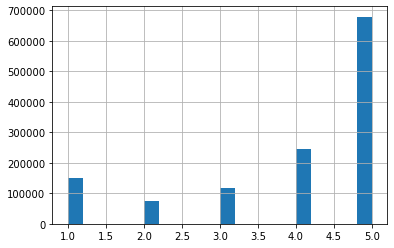

In [64]:
# Plot the ratings distribution w. many bins to make sure what the values are
X_train['rating'].hist(bins=20)

From this histogram we can infer that indeed most ratings are 5.0, and much less are less than the maximum value. **Data almost fits the geometric distribution, except the "1" score**.

Also, we can see that the value is indeed discreet - 5 different values, between 1 to 5.

<AxesSubplot:>

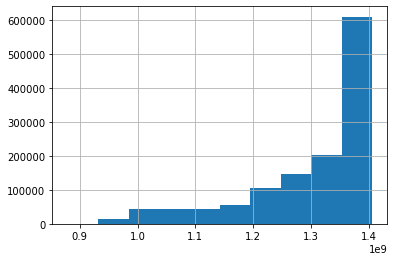

In [65]:
X_train['timestamp'].hist()

Here as well the data fits geometric distribution. Yet as we explained before, this might be affected from the popularity of our store, and does not represent a change in customer behavior.

Next, we would like to try and get some more info about our items, and about our users.

We will plot 4 different graphs:
1. Group users by amount of items rated
2. Group users by mean rating score
3. Group items by amount of users rated them
4. Group items by mean rating score

---

**Group users by amount of items rated:**

The following histogram maps the number of users by numbers of ratings per user:

1. X axis - number of ratings
2. Y axis - number of users with this number of ratings

<AxesSubplot:>

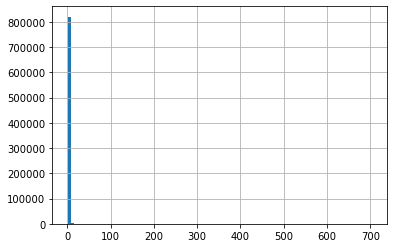

In [66]:
X_train['user'].value_counts().hist(bins=100)

Many users (800,000+) rated only a small amount of products. **This will help us in future planning of the required algorithms**.

We will calculate the amount of distinct users:

In [67]:
unique_users = X_train['user'].nunique()
print(f"Number of unique users is: {unique_users}")

Number of unique users is: 826767


Out of the number of ratings:

In [68]:
m = X_train.shape[0]
print(f"Number of ratings are: {m}")

Number of ratings are: 1264752


By basic combinatorical concepts, we can understand (as we've seen in section 3) that most of our users, and therefore our data, consists of users with only very few ratings.

We will plot the graph above without users rating only one item, to make the histogram more readable:

<AxesSubplot:>

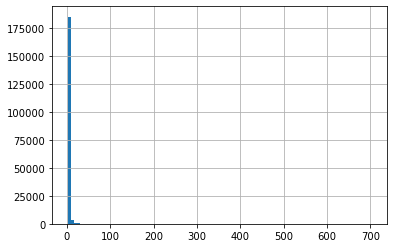

In [69]:
X_train[X_train.groupby('user').user.transform('count') > 1]['user'].value_counts().hist(bins=100)

Even now, we can see that most users have The least amount of ratings.

We will simply print the number of users for each amount of ratings to the scree, **instead of using the graphs which are harder to see**:

In [70]:
# copy the X_train
ratings_data = X_train.copy()

# calc number of ratings for each user and add to the new df:
ratings_data['ratings number'] = X_train.groupby('user').user.transform('count')

ratings_data.head()

,user,item,rating,timestamp,ratings number
0,A35BKARXRL7XDD,B00DBCAS7E,5.0,1397088000,4
1,A1BHXHZHSLYU0P,B0007Z70YM,4.0,1315785600,6
2,A2T3KP9PIE5D9Y,B003BVIXWW,5.0,1397260800,17
3,ATDXFI4YZRGOM,B003JVCA9Q,4.0,1309996800,9
4,A13TO1ZFAH9SVN,B00005N6K3,5.0,1099958400,13


In [71]:
# group by number of ratings, and count only uniques:
count_per_ratings = ratings_data.groupby('ratings number')['user'].nunique()

count_per_ratings

ratings number
1      636867
2      105627
3       36355
4       26317
5        5609
        ...  
379         1
417         1
637         1
653         1
704         1
Name: user, Length: 127, dtype: int64

As we can see above, numbers are falling drasticaly in each increase of ratings number.

In order to plot a relevant graph that is easier to understand, we will try to plot the **logarithm of the values, in order to show the change in order of magnitudes**.

<AxesSubplot:xlabel='ratings number'>

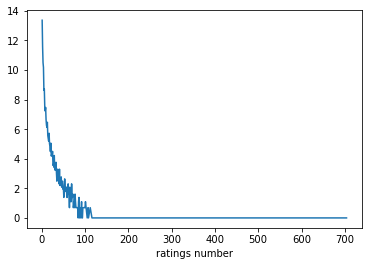

In [72]:
# implement numpy's logarithm
np.log(count_per_ratings).plot(use_index=True)

From the graph above we can understand that number of ratings per user drops exponentialy until the 50-100 ratings range, in which the graph is more linear. For 100+ ratings, we have only a single user with that amount of ratings (since the value of log(1) is zero)

That is because a logarithmic graph **plots the percentage of change, instead of the absolute value**.

---

**Group users by mean rating score:**

We will perform similar steps to above, first calculating the avg. score each user gives:

In [73]:
# group by average score of user:
ratings_data['avg_user_rating'] = ratings_data.groupby('user').rating.transform('mean')

ratings_data.head()

,user,item,rating,timestamp,ratings number,avg_user_rating
0,A35BKARXRL7XDD,B00DBCAS7E,5.0,1397088000,4,3.750000
1,A1BHXHZHSLYU0P,B0007Z70YM,4.0,1315785600,6,2.833333
2,A2T3KP9PIE5D9Y,B003BVIXWW,5.0,1397260800,17,4.823529
3,ATDXFI4YZRGOM,B003JVCA9Q,4.0,1309996800,9,3.555556
4,A13TO1ZFAH9SVN,B00005N6K3,5.0,1099958400,13,4.692308


Now we will plot both the histogram of the average ratings per user, and then the histogram of the ratings itself (which was presented above as well)

<AxesSubplot:>

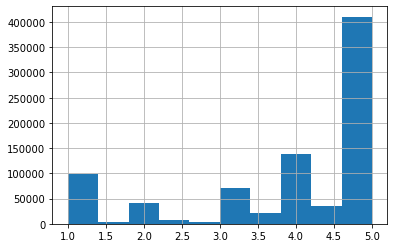

In [74]:
# user average ratings histogram : by counting each user only once
ratings_data.drop_duplicates(subset='user', keep='last')['avg_user_rating'].hist()

<AxesSubplot:>

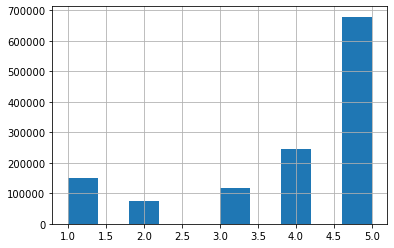

In [75]:
# average rating histogram
ratings_data['rating'].hist()

We see almost no differences in the histograms, except decrease of numbers because of duplicates.

We can infer that most ratings users gave to items are good and not bad.

We get an interesting histogram when we cut it to 100+ bins:

<AxesSubplot:>

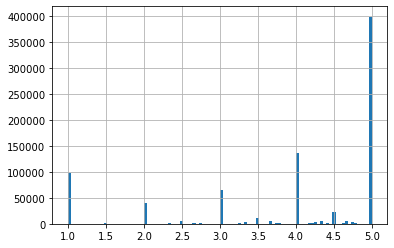

In [76]:
ratings_data.drop_duplicates(subset='user', keep='last')['avg_user_rating'].hist(bins=100)

We see very high peeks in the 1,2,3,4,5 values, and that is because of users with only a single rating.

This makes us understand, that maybe **the distrubtion of users with higher amount of ratings, are different**. In other words, maybe we have many positive ratings because we are looking at users with a small amount of ratings.

**Now we will view the histogram of users with only 15+ ratings**. 15 Was chosen by the logarithmic graph we presented above - 15 is where the gradient start decreasing in value.

<AxesSubplot:>

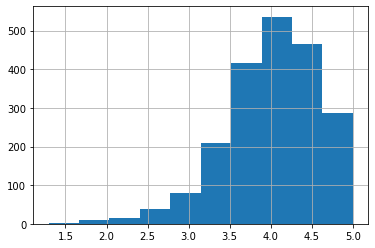

In [77]:
# keep only users with 15+ ratings:
MIN_RATINGS = 15
ratings_data[ratings_data['ratings number'] > MIN_RATINGS].drop_duplicates(subset='user')['avg_user_rating'].hist()

**And now we finally got some interesting results!!**

By removing the outliers with small amount of ratings, we get a distribution that is more similar to a normal distribution. **An interesting conclusion is that data distributes not on the median score (which is 3), but around 4 - users yet tend to give more than average score to items**. And we need to remember that during training.

Our dataset is much (much) smaller, but might be much better at predicting actual results.

<AxesSubplot:>

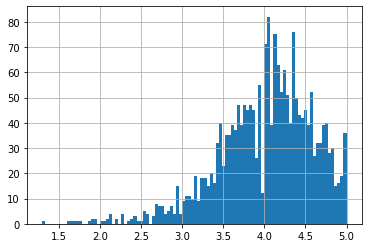

In [78]:
# Viewing that dataframe with more bins:
ratings_data[ratings_data['ratings number'] > MIN_RATINGS].drop_duplicates(subset='user')['avg_user_rating'].hist(bins=100)

Now we see the same histogram with more bins, for better view of the distribution, **which looks like a normal distribution excep the long 1.5-3.5 values "tail".**

---

**Group items by amount of users rated them**

Now, we will plot graphs focused on the items and not on the users - with similar graphs:

<AxesSubplot:>

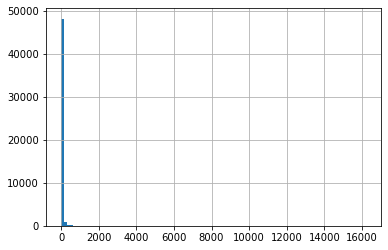

In [79]:
ratings_data['item'].value_counts().hist(bins=100)

The following histogram amove maps the number of items by numbers of ratings per item:

1. X axis - number of ratings
2. Y axis - number of items with this number of ratings

We see a similar distribution to what we've seeb before: **Most items are rated only a small number of times.**

We will view that number with a simple calculation:

In [80]:
# add column of "item ratings":
ratings_data['item_ratings'] = ratings_data.groupby('item')['item'].transform('count')

# group by number of ratings, and count only uniques:
count_per_items = ratings_data.groupby('item_ratings')['item'].nunique()

count_per_items

item_ratings
1        11098
2         6114
3         3911
4         2943
5         2229
         ...  
5090         1
5487         1
5711         1
7392         1
16198        1
Name: item, Length: 680, dtype: int64

We can see here also a very steep decrease in ratings amount:
1. 11,098 items were rated only once
2. About half of it (6114) were rated twice
3. The number keep decreasing exponentialy

Plotting again the logarithmic graph for the **change in order of magnitudes:**

<AxesSubplot:xlabel='item_ratings'>

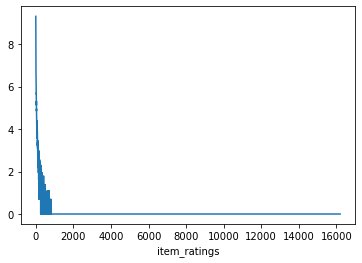

In [81]:
np.log(count_per_items).plot(use_index=True)

And we got an even steeper curve than before (the users logarithmic curve).

**Group items by mean rating score:**

Now we will perform the opposite mean rating calculation - on the items instead of on the users:

In [82]:
# Create a column for the items ratings
ratings_data['avg_item_rating'] = ratings_data.groupby('item').rating.transform('mean')

Let's peek at out new dataframe's column:

In [83]:
ratings_data.head()

,user,item,rating,timestamp,ratings number,avg_user_rating,item_ratings,avg_item_rating
0,A35BKARXRL7XDD,B00DBCAS7E,5.0,1397088000,4,3.750000,20,3.550000
1,A1BHXHZHSLYU0P,B0007Z70YM,4.0,1315785600,6,2.833333,67,3.208955
2,A2T3KP9PIE5D9Y,B003BVIXWW,5.0,1397260800,17,4.823529,39,2.333333
3,ATDXFI4YZRGOM,B003JVCA9Q,4.0,1309996800,9,3.555556,1115,3.496861
4,A13TO1ZFAH9SVN,B00005N6K3,5.0,1099958400,13,4.692308,342,4.438596


And build a histogram based on these ratings:

<AxesSubplot:>

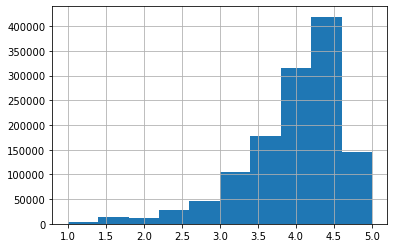

In [84]:
ratings_data['avg_item_rating'].hist()

What we find interesting about this distribution, is that it is different from the average user ratings distribution. when we limited ourself to users with 15+ ratings. **The main difference is that the mean is higher in this histogram (closer to 4.5) than the previous user histogram (closer to 4).

**Our explanation for this difference is dropping the users with small amount of ratings, mostly with high score ratings.** Their ratings increase the mean ratings of items, and moves the histogram's mean to the right (higher value).

---

#### 4.3.2 EDA for the items dataset

##### 4.3.2.1 Attributes statistics

We will start again by printing and analyzing the information about our dataset. We already made some changes to this dataframe in the previous part (4.1)

In [85]:
items_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50953 entries, 0 to 50952
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   asin                                 50953 non-null  object 
 1   description                          47063 non-null  object 
 2   price                                43905 non-null  float64
 3   categories                           50953 non-null  object 
 4   also_bought                          28965 non-null  object 
 5   bought_together                      20654 non-null  object 
 6   buy_after_viewing                    39905 non-null  object 
 7   also_viewed                          14839 non-null  object 
 8   Video Games salesRank                45278 non-null  float64
 9   Toys & Games salesRank               148 non-null    float64
 10  Software salesRank                   2236 non-null   float64
 11  Electronics salesRank       

And the dataframe's head:

In [86]:
items_metadata_df.head()

,asin,description,price,categories,also_bought,bought_together,buy_after_viewing,also_viewed,Video Games salesRank,Toys & Games salesRank,...,Cell Phones & Accessories salesRank,Camera &amp; Photo salesRank,"Patio, Lawn & Garden salesRank","Arts, Crafts & Sewing salesRank",Industrial & Scientific salesRank,Pet Supplies salesRank,Shoes salesRank,Health & Personal Care salesRank,Jewelry salesRank,Home Improvement salesRank
0,0078764343,Brand new sealed!,37.98,"[Video Games, Xbox 360, Games]","[B000TI836G, B003Q53VZC, B00EFFW0HC, B003VWGBC...",[B002I098JE],"[B0050SY5BM, B000TI836G, B0037LTTRO, B002I098JE]",NaN,28655.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,043933702X,In Stock NOW. Eligible for FREE Super Saving ...,23.50,"[Video Games, PC, Games]",NaN,NaN,"[B000067NP1, 0439573947, B00003W869, 0486406105]","[B000067NP1, 0439573947, B00005V97H, B00004DIT...",44080.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0439339987,Grandma Groupers kelp seeds are missing and wi...,8.95,"[Video Games, PC, Games]","[B000314VVU, B000PXUOTE, B00004TJCM, B0006U22X...",NaN,"[B00004UCUS, B000YFIS00]",NaN,49836.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0439342260,This software is BRAND NEW. Packaging may diff...,NaN,"[Video Games, PC, Games]",NaN,NaN,NaN,[043934302X],49156.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0439339960,a scholastic clubs fairs cd rom game,NaN,"[Video Games, PC, Games]",NaN,NaN,NaN,[B00028D7TG],52262.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Our first conclusion is that we are missing most values from our new columns we made on the previous part!

Some columns has only 1 value out of 50,000+ rows!

We have 2 options:
1. Delete all columns 9-30
2. Try to use the data in a different way

Since almost all items (90%+) has a Video Games rank, we can ignore the items that have another ranking in another category, and simply delete those columns for now. (We will remove them later in the preprocessing part)

We have enoguh data in the existing columns to use for the items predictions.

Our next conclusion from looking at the data information, is that in opposite of the previous dataset (ratings), **here we have missing values in almost all attributes.**

Yet, except the attributes:
1. also_bought
2. bought_together
3. buy_after_viewing
4. also_viewed

(Which were created by us before)

**Almost all other attributes have 90%+ of existing values.**

Next we will analyze their usefulness for our task, and decide how to impute the missing values for our goal.

---

#### 4.3.2.2 Attributes visualizations

Now we will try to plot each one of our attributes to get some more insights for our analysis.

**We will start with the "price" attribute:**

<AxesSubplot:>

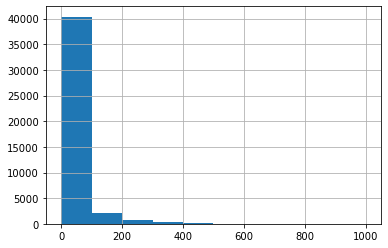

In [87]:
items_metadata_df['price'].hist()

We can see a geometric destribution, with most items between the 0-100 level price. **This is reasonable, since video games should be at this price range.**

We will try to see the distrubtion inside the 0-100 range:

<AxesSubplot:>

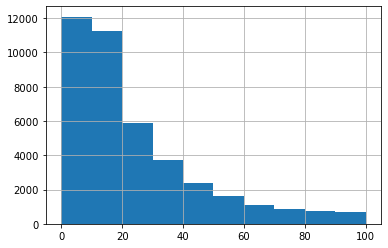

In [88]:
MAX_PRICE = 100

items_metadata_df[items_metadata_df['price'] < MAX_PRICE]['price'].hist()

We see that even here, the distribution is geometric - almost all games are between the 0-20 price range, and very few are higher than 50$ per item.

Now we will try to find a more interesting connection, and plot the distribution of items only rated above a score of 4.5.

Later we will look for concrete correlation between price and score.

<AxesSubplot:>

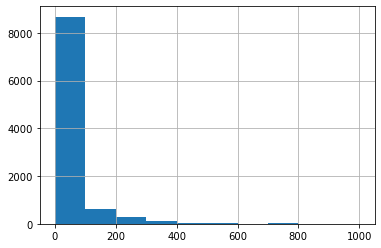

In [89]:
# View only items rated more than 4.5, without all the duplicates
top_rated_items = ratings_data[ratings_data['avg_item_rating'] > 4.5]['item'].drop_duplicates()

# Get only the metadata of the top rated items, and plot their price
items_metadata_df.loc[items_metadata_df['asin'].isin(top_rated_items)]['price'].hist()

Distribution seems the same, which most items are in the 0-100 price range. We will try one more time to limit ourself to the 0-100 price range:

<AxesSubplot:>

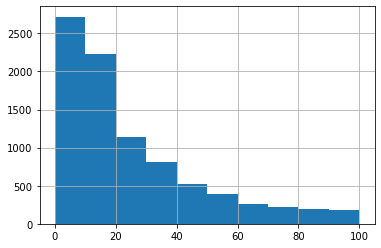

In [90]:
# Implementing both item's rating condition, and price condition
items_metadata_df.loc[(items_metadata_df['asin'].isin(top_rated_items)) & (items_metadata_df['price'] < 100)]['price'].hist()

Even here, we get a very similar distriution, which indicates that price is probably not a very good indicator for the average score.

**Next, the description attribute:**

Since the description is from type **string**, we can't visualize specific parameters about the text.

Yet, we will do 2 things:
1. Plot the lengths of the descriptions
2. Plot the most common words that appear in the text

In [91]:
# Save the description's length in a dataframe
description_lengths = items_metadata_df['description'].apply(lambda x : len(str(x)))

<AxesSubplot:>

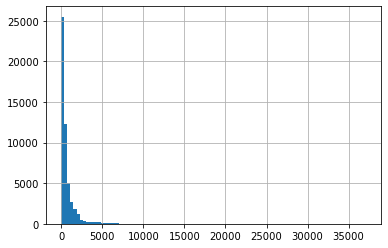

In [92]:
description_lengths.hist(bins=100)

We can see that most descriptions are short, and very few are more then 3000 characters.

We will try to plot the histogram again, and now to ignore the empty descriptions:

<AxesSubplot:>

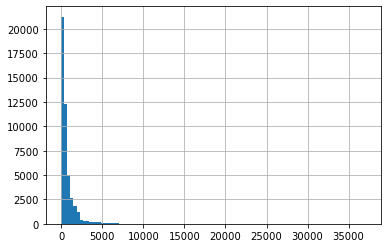

In [93]:
description_lengths[description_lengths > 0].hist(bins=100)

The difference is small, in around 5,000 descriptions which are empty.

Although the disptibution fits the geometric distribution, we can view the 5,000+ chars descriptions as outliers, and consider it later in the training.

Now we will look for the 100 most common words. In order to do so, we will have to perform basic preprocess to our description column, implementing NLP transformations learned in the course:

In [94]:
# import nltk for NLP preprocess + downloads the required dictionaries
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
# for iterating the text
import collections

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now we try to get the top 100 words from all the description column:

In [95]:
collections.Counter(" ".join(items_metadata_df["description"]).split()).most_common(100)

TypeError: sequence item 15: expected str instance, float found

We see that not all values exist, and instead we have floats in the dataframe - **which are the NaN values**.

For now, we will create a copy of the text, and manipulate it for the visualizations. Later we will probably use some of these manipulations for the training as well.

In [96]:
# copy the descriptions
descriptions = items_metadata_df['description']

In [97]:
# Conver the "nan" values to empty strings
def convert_description_nan(x):
    return '' if pd.isna(x) else x

descriptions = descriptions.apply(convert_description_nan)

Now we will implement it again:

In [98]:
collections.Counter(" ".join(descriptions).split()).most_common(100)

[('the', 251091),
 ('and', 181442),
 ('of', 127270),
 ('to', 125895),
 ('a', 98022),
 ('in', 67139),
 ('your', 58211),
 ('with', 55950),
 ('you', 49827),
 ('for', 46631),
 ('is', 42075),
 ('on', 31825),
 ('as', 31475),
 ('The', 29226),
 ('that', 27889),
 ('game', 25798),
 ('or', 25726),
 ('from', 24964),
 ('are', 22705),
 ('an', 20578),
 ('new', 19897),
 ('can', 19109),
 ('will', 18436),
 ('by', 15707),
 ('all', 15010),
 ('be', 14201),
 ('this', 13898),
 ('-', 12895),
 ('it', 12763),
 ('up', 12041),
 ('their', 11956),
 ('have', 11534),
 ('more', 11311),
 ('at', 10890),
 ('players', 10567),
 ('into', 10241),
 ('has', 10022),
 ('through', 9008),
 ('one', 8866),
 ('play', 8730),
 ('out', 7807),
 ('This', 7804),
 ('his', 7693),
 ('most', 7420),
 ('not', 7345),
 ('Xbox', 7308),
 ('games', 7133),
 ('over', 6907),
 ('but', 6843),
 ('world', 6787),
 ('like', 6678),
 ('they', 6521),
 ('other', 6414),
 ('also', 6141),
 ('which', 6089),
 ('Nintendo', 6040),
 ('any', 6001),
 ('than', 6001),
 ('Wii

And we got our top 100 words! the problem is that most of these words are in fact 'stopwords' - words that don't help us understand anything about the sentence.

Therefore, we will have to remove them in advance, and then apply the calculation again.

We will have to do 2 things:
1. Convert the text to lists holding the different words
2. Removing the stopwords

In [99]:
# Convert to list of words
descriptions = descriptions.apply(lambda text : nltk.word_tokenize(text))

In [100]:
# view top descriptions:
descriptions.head()

0                              [Brand, new, sealed, !]
1    [In, Stock, NOW, ., Eligible, for, FREE, Super...
2    [Grandma, Groupers, kelp, seeds, are, missing,...
3    [This, software, is, BRAND, NEW, ., Packaging,...
4         [a, scholastic, clubs, fairs, cd, rom, game]
Name: description, dtype: object

In [101]:
# stopwords corpus
english_stopwords = stopwords.words('english')

In [102]:
# Remove stopwords: (this will take a few minutes, since our corpus is huge)
descriptions = descriptions.apply(lambda text : [word for word in text if not word in english_stopwords])

In [103]:
# view the head again:
descriptions.head()

0                              [Brand, new, sealed, !]
1    [In, Stock, NOW, ., Eligible, FREE, Super, Sav...
2    [Grandma, Groupers, kelp, seeds, missing, with...
3    [This, software, BRAND, NEW, ., Packaging, may...
4            [scholastic, clubs, fairs, cd, rom, game]
Name: description, dtype: object

Now, we will try implementing it again to get some insights about the most common words:

In [104]:
descriptions = descriptions.apply(lambda words_list : " ".join(words_list))

In [105]:
# no need to split the descriptions again, since we already split it to lists
collections.Counter(" ".join(descriptions).split()).most_common(100)

[(',', 261965),
 ('.', 180679),
 (':', 68297),
 (';', 62999),
 ("''", 50700),
 ('&', 42226),
 ('game', 33854),
 ('The', 31300),
 ("'s", 30076),
 ('!', 29979),
 ('new', 20407),
 ('#', 18714),
 (')', 17742),
 ('(', 17665),
 ('-', 13210),
 ('nbsp', 12918),
 ('players', 11950),
 ('play', 11131),
 ('games', 10976),
 ('false', 10820),
 ('world', 10577),
 ('``', 10082),
 ('one', 9576),
 ('--', 8658),
 ('2', 8281),
 ('This', 8170),
 ('Xbox', 8102),
 ('time', 7880),
 ('You', 7314),
 ('experience', 7294),
 ('/', 7245),
 ('action', 7119),
 ('like', 6904),
 ('Wii', 6793),
 ('features', 6618),
 ('Nintendo', 6579),
 ('?', 6273),
 ('way', 6273),
 ('also', 6195),
 ('It', 6170),
 ('>', 6012),
 ('3', 5976),
 ('system', 5954),
 ('<', 5942),
 ('take', 5926),
 ('including', 5823),
 ('characters', 5746),
 ('player', 5727),
 ('use', 5665),
 ('control', 5661),
 ('In', 5625),
 ('gameplay', 5570),
 ('1', 5532),
 ('controller', 5495),
 ('Game', 5296),
 ('360', 5294),
 ("n't", 5261),
 ('mode', 5180),
 ('unique', 

It's interesting to see that most common words are charcters in sentences that are irrelevant to the sentence like "," or ".".

We will try to look at the real words in our most common list to look for some insights. Some of the most interesting words are like "players", "graphics", "action" and "PlayStation", that give us some info about the most common video games - They might be related to multiplayer games, in the "action games" category, the graphics as an importent aspect, and PlayStation as a common consule.

**Lastly, we will check the salesRank attribute**

First we will plot the histogram of the sales Ranking of the videoGames. We are likely to see a flat distribution - given that we are analyzing all the items in the video games category:

<AxesSubplot:>

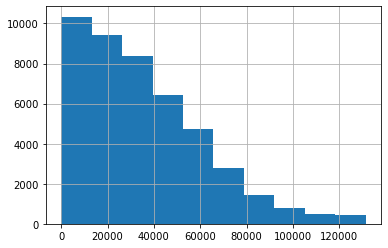

In [106]:
# Plot the average sales Rank in the videoGames category
items_metadata_df['Video Games salesRank'].hist()

**Here we get something interesting!**

It seems like in the first 20,000 games we got all the rankings - each bar in the histogram is about 10,000 rankings, for the first two bars.

Yet, we can see that:
1. **As the items become worse, their ranking amount drops** - meaning that we are missing more items
2. **There are more than 120,000 rankings!** - which means that our database does not hold all the possible video games that exist.



**Correlation**

At the end of the EDA, We will try to look for correlation between the Video Games salesRank, and the price of an item.

It won't give us concrete conclusions about the preferences of each user, but will give us an idea about how the two features behave.

We will use the "corr" method in pandas for that calculation:

In [107]:
items_metadata_df['price'].corr(items_metadata_df['Video Games salesRank'])

-0.1235766859394814

We can see a very low correlation between the two, and a negative one - which was expected (When price is lower, the item is preferable)

When we try to plot the correlation we get a messy scatter plot that indicated that **the correlation is indeed very low (and negative)**:

<AxesSubplot:xlabel='price', ylabel='Video Games salesRank'>

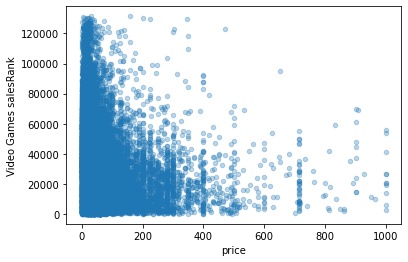

In [108]:
items_metadata_df.plot(kind='scatter', x='price', y='Video Games salesRank', alpha=0.3)

**Feature Engineering**

By understanding the data above, we can think of two new features we can add to the dataframe:
1. Description length - which might be related to how many people buy and like a product they understand (Our guess - the longer the description, the higher the rank will be)
2. Multiply the price and the salesRank score - since there is only small correlation between the two - a combined feature of them might be a strong feature in the process

**Note on feature engineering and the last 4 columns:**

We didn't analyze the 4 attributes left in the metadata column yet: viewed, bought, bought together, etc.

We will keep them to the next section, when we will use them in the data prepreation process **with clustering implementation on the data for more features creation and for better results**.

#### 4.3.3 EDA Conclusions

**Ratings dataframe**:
1. **Most items and most users rated items between 1-5 times**.
2. **Users with small amount of ratings tend to rate only products (items) they like (5 stars)**, and not products they hate (e.g. a user will register to the service to rate something he liked, and not something he didn't like).
3. **Users with bigger number of ratings tend to have a normal distribution of their ratings**, where ~4 is the mean rating.
4. Our mean rating is higher than the average, and **that is probably because of many user with very high ratings.**

**Items Dataframe**:
1. Most salesRank data about the other categories is useless, **because it's almost entirly missing.**
2. Most items are cheap (0-20 budget), and by analyzing the two histograms of top rated items prices and all items prices, it **doesn't seems like there is a correlation between the price of an item and its average rating.**
3. Most descriptions are short, and no special words were found in the counter analysis.
4. We have more than 50,000 items in total by the salesRank category, so we have many missing items - most of them are not rated as top rated items: **It will probably be harder for us to predict ratings for items with lower rank sales**

## 5. Data Preperation

In this section, we will perform the following steps:
1. Remove columns and features we decided are not relevant for us
2. Fill in missing values for some of the attributes
3. Create the new features we decided on the feature engineering section, and add more transformations of the data
4. **Implement clustering** - as we explained above on the 4 new columns

### 5.1 Features removal

#### 5.1.1 The ratings dataframe

As explained, the 'timestamp' column is irrelevant for us. Yet, **we won't remove it since it is required as a field in most recommendation system algorithms.**So for simpler implementation only we will keep this column.

#### 5.1.2 The items dataframe

All salesRank columns except the video games column are irrelevant. 

Therefore, we will remove them now:

In [109]:
# Using the sales_keys_columns from section 4, we will drop the 'Video Games' from it and then remove all other columns
new_sales_dict_keys.remove('Video Games salesRank')

In [110]:
# Remove all the columns
items_metadata_df = items_metadata_df.drop(new_sales_dict_keys, axis=1)

And the dataframe after the removal:

In [111]:
items_metadata_df.head()

,asin,description,price,categories,also_bought,bought_together,buy_after_viewing,also_viewed,Video Games salesRank
0,0078764343,Brand new sealed!,37.98,"[Video Games, Xbox 360, Games]","[B000TI836G, B003Q53VZC, B00EFFW0HC, B003VWGBC...",[B002I098JE],"[B0050SY5BM, B000TI836G, B0037LTTRO, B002I098JE]",NaN,28655.0
1,043933702X,In Stock NOW. Eligible for FREE Super Saving ...,23.50,"[Video Games, PC, Games]",NaN,NaN,"[B000067NP1, 0439573947, B00003W869, 0486406105]","[B000067NP1, 0439573947, B00005V97H, B00004DIT...",44080.0
2,0439339987,Grandma Groupers kelp seeds are missing and wi...,8.95,"[Video Games, PC, Games]","[B000314VVU, B000PXUOTE, B00004TJCM, B0006U22X...",NaN,"[B00004UCUS, B000YFIS00]",NaN,49836.0
3,0439342260,This software is BRAND NEW. Packaging may diff...,NaN,"[Video Games, PC, Games]",NaN,NaN,NaN,[043934302X],49156.0
4,0439339960,a scholastic clubs fairs cd rom game,NaN,"[Video Games, PC, Games]",NaN,NaN,NaN,[B00028D7TG],52262.0


### 5.2  Complete missing values

The ratings dataframe does not miss any value, as we've seen above in section 4.

Let's see again what is missing from our items dataframe:

In [112]:
items_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50953 entries, 0 to 50952
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   asin                   50953 non-null  object 
 1   description            47063 non-null  object 
 2   price                  43905 non-null  float64
 3   categories             50953 non-null  object 
 4   also_bought            28965 non-null  object 
 5   bought_together        20654 non-null  object 
 6   buy_after_viewing      39905 non-null  object 
 7   also_viewed            14839 non-null  object 
 8   Video Games salesRank  45278 non-null  float64
dtypes: float64(2), object(7)
memory usage: 3.5+ MB


Categories: also_bought, bought_together, buy_after_viewing and also_viewed will be prepared later in the clustering part.

We are left with 3 relevant missing categories:
1. Description
2. Price
3. Video Games salesRank

#### 5.2.1 Description missing values

We will fill the missing values as we've done in section 4 - switch the 'nan' values with an empty description string:

In [113]:
# Using lambda expression
items_metadata_df['description'] = items_metadata_df['description'].apply(lambda text : '' if pd.isna(text) else text)

Let's see that now we don't have any missing values:

In [114]:
items_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50953 entries, 0 to 50952
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   asin                   50953 non-null  object 
 1   description            50953 non-null  object 
 2   price                  43905 non-null  float64
 3   categories             50953 non-null  object 
 4   also_bought            28965 non-null  object 
 5   bought_together        20654 non-null  object 
 6   buy_after_viewing      39905 non-null  object 
 7   also_viewed            14839 non-null  object 
 8   Video Games salesRank  45278 non-null  float64
dtypes: float64(2), object(7)
memory usage: 3.5+ MB


All description fields are full, as required.

#### 5.2.2 Price missing values

Since we know that most prices are in the 0-20 range, and that this attribute is numerical, we will use the Imputer in "Sklearn" to insert the mean price for each missing value:

In [115]:
from sklearn.impute import SimpleImputer

In [116]:
# Define the imputer strategy - mean
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

In [117]:
# calculate the mean impute and add it to the column
items_metadata_df['price'] = imputer.fit_transform(np.array(items_metadata_df['price']).reshape(-1,1))

And let's check again that the price column is now full:

In [118]:
items_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50953 entries, 0 to 50952
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   asin                   50953 non-null  object 
 1   description            50953 non-null  object 
 2   price                  50953 non-null  float64
 3   categories             50953 non-null  object 
 4   also_bought            28965 non-null  object 
 5   bought_together        20654 non-null  object 
 6   buy_after_viewing      39905 non-null  object 
 7   also_viewed            14839 non-null  object 
 8   Video Games salesRank  45278 non-null  float64
dtypes: float64(2), object(7)
memory usage: 3.5+ MB


It has 50,593 values as expected.

#### 5.2.3 salesRank missing values

We will use a similar strategy for the salesRank as we've used for the price attribute, but with one big change.

We know that most of the first 20,000 items already has a rank, but from then on, many items are missing a rank. When calculated, we can see that the mean salesRank is about ~35,000 in value:

In [119]:
print(f"The mean value of the salesRank attribute is: {items_metadata_df['Video Games salesRank'].mean()}.")

The mean value of the salesRank attribute is: 35478.28232254075.


The only problem with taking the mean value for all the missing fields, is that all of them will get the same rank, and we won't be able to compare them to one another if we would like to do so later in the training. 

Therefore, we will implement by ourself a more complex imputation strategy, and we will impute values from a normal distribution with a mean of the current mean:

In [120]:
# mean calculated
MU_SALES_RANK = items_metadata_df['Video Games salesRank'].mean()

# standard deviation, approx. according to the visualizations in section 4
SIGMA_SALES_RANK = 5000

def mean_dist_imputation(value):
    if pd.isna(value):
        return np.random.normal(MU_SALES_RANK, SIGMA_SALES_RANK)
    else:
        return value

In [121]:
# Applying the imputation
items_metadata_df['Video Games salesRank'] = items_metadata_df['Video Games salesRank'].apply(mean_dist_imputation)

And finally, let's look again at the dataframe's info, and make sure that we have no more values missing other than the 4 categories:

In [122]:
items_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50953 entries, 0 to 50952
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   asin                   50953 non-null  object 
 1   description            50953 non-null  object 
 2   price                  50953 non-null  float64
 3   categories             50953 non-null  object 
 4   also_bought            28965 non-null  object 
 5   bought_together        20654 non-null  object 
 6   buy_after_viewing      39905 non-null  object 
 7   also_viewed            14839 non-null  object 
 8   Video Games salesRank  50953 non-null  float64
dtypes: float64(2), object(7)
memory usage: 3.5+ MB


### 5.3 Feature engineering

Now we will add all the features we discussed before, and we will add some more transformation column. In summary, we will add the following features:
1. Description length
2. Multiply the price and salesRank column
3. Add a price^2 feature
4. Add a log(price) feature
5. Add a salesRank^2 feature
6. Add a log(salesRank) feature

#### 5.3.1 Description length

This feature is the easiest to add:

In [123]:
items_metadata_df['description_length'] = items_metadata_df['description'].apply(lambda text : len(str(text)))

Our new column:

In [124]:
items_metadata_df['description_length']

0          17
1         497
2         772
3         152
4          36
         ... 
50948       0
50949    1089
50950    1089
50951       0
50952       0
Name: description_length, Length: 50953, dtype: int64

#### 5.3.2 Multiply price and salesRank

Will be created in the same method as the description length: (Note: we will add the square root, since the values will be high)

In [125]:
items_metadata_df['price_salesRank_mult'] = np.sqrt(items_metadata_df['price'] * items_metadata_df['Video Games salesRank'])

Our new column:

In [126]:
items_metadata_df['price_salesRank_mult']

0        1043.224281
1        1017.781902
2         667.856422
3        1417.490219
4        1461.587486
            ...     
50948     658.644220
50949    1083.144092
50950    1214.958219
50951     921.115511
50952     626.194178
Name: price_salesRank_mult, Length: 50953, dtype: float64

#### 5.3.3 Add $price^2$

All the 4 new features are created in order to try and find better usage of these attributes - using the magnitude of change, or non-linear relations

In [127]:
items_metadata_df['price_squared'] = items_metadata_df['price'] ** 2

#### 5.3.4 Add $\sqrt{price}$

In [128]:
items_metadata_df['price_sqrt'] = items_metadata_df['price'] ** 0.5

#### 5.3.5 Add $salesRank^2$

In [129]:
items_metadata_df['salesRank_squared'] = items_metadata_df['Video Games salesRank'] ** 2

#### 5.3.4 Add $\sqrt{salesRank}$

In [130]:
items_metadata_df['salesRank_sqrt'] = items_metadata_df['Video Games salesRank'] ** 0.5

Finally, we will view our dataframe after adding all the features:

In [131]:
items_metadata_df.head()

,asin,description,price,categories,also_bought,bought_together,buy_after_viewing,also_viewed,Video Games salesRank,description_length,price_salesRank_mult,price_squared,price_sqrt,salesRank_squared,salesRank_sqrt
0,0078764343,Brand new sealed!,37.98000,"[Video Games, Xbox 360, Games]","[B000TI836G, B003Q53VZC, B00EFFW0HC, B003VWGBC...",[B002I098JE],"[B0050SY5BM, B000TI836G, B0037LTTRO, B002I098JE]",NaN,28655.0,17,1043.224281,1442.480400,6.162792,8.211090e+08,169.277878
1,043933702X,In Stock NOW. Eligible for FREE Super Saving ...,23.50000,"[Video Games, PC, Games]",NaN,NaN,"[B000067NP1, 0439573947, B00003W869, 0486406105]","[B000067NP1, 0439573947, B00005V97H, B00004DIT...",44080.0,497,1017.781902,552.250000,4.847680,1.943046e+09,209.952376
2,0439339987,Grandma Groupers kelp seeds are missing and wi...,8.95000,"[Video Games, PC, Games]","[B000314VVU, B000PXUOTE, B00004TJCM, B0006U22X...",NaN,"[B00004UCUS, B000YFIS00]",NaN,49836.0,772,667.856422,80.102500,2.991655,2.483627e+09,223.239781
3,0439342260,This software is BRAND NEW. Packaging may diff...,40.87555,"[Video Games, PC, Games]",NaN,NaN,NaN,[043934302X],49156.0,152,1417.490219,1670.810564,6.393399,2.416312e+09,221.711524
4,0439339960,a scholastic clubs fairs cd rom game,40.87555,"[Video Games, PC, Games]",NaN,NaN,NaN,[B00028D7TG],52262.0,36,1461.587486,1670.810564,6.393399,2.731317e+09,228.608836


### 5.4 Clustering implementation

...

---

## 6 Choosing and training models

This section will be divided into a few parts:
1. Explaining the strategy behind training the models
2. Introduction to the recommendation system algorithms
3. Training different models with different algorithms

---

### 6.1 Strategy of training

Our strategy will be to try and train many different models, with many different algorithms, to check fast what is working and what's not, before dwelling into one or two algorithms and trying to improve them (Section number 7).

We will analyze the matrices of each model and algorithm as we decided in section no. 2 (RMSE as the performance measurment), then try to make some more feature engineering and data preperation. **e.g. we might try to use the text in the description better, or use the "bought together" columns w. clustering methods**.

At the end, we will present a short list of the most promising models to work with at the fine-tuning section.

---

### 6.2 Introduction to the algorithms

Recommendation systems has three main paradigms of solving its problem statement (predicting what rating will a user give to given item):
1. Collaborative filtering
2. Content-based
3. Hybrid methods

#### 6.2.1 Collaborative filtering models

A method that is based only on the user-item interactions, a.k.a ratings matrix. In our example, the ratings dataframe is another way to present the ratings matrix: with users as rows, and items as columns:

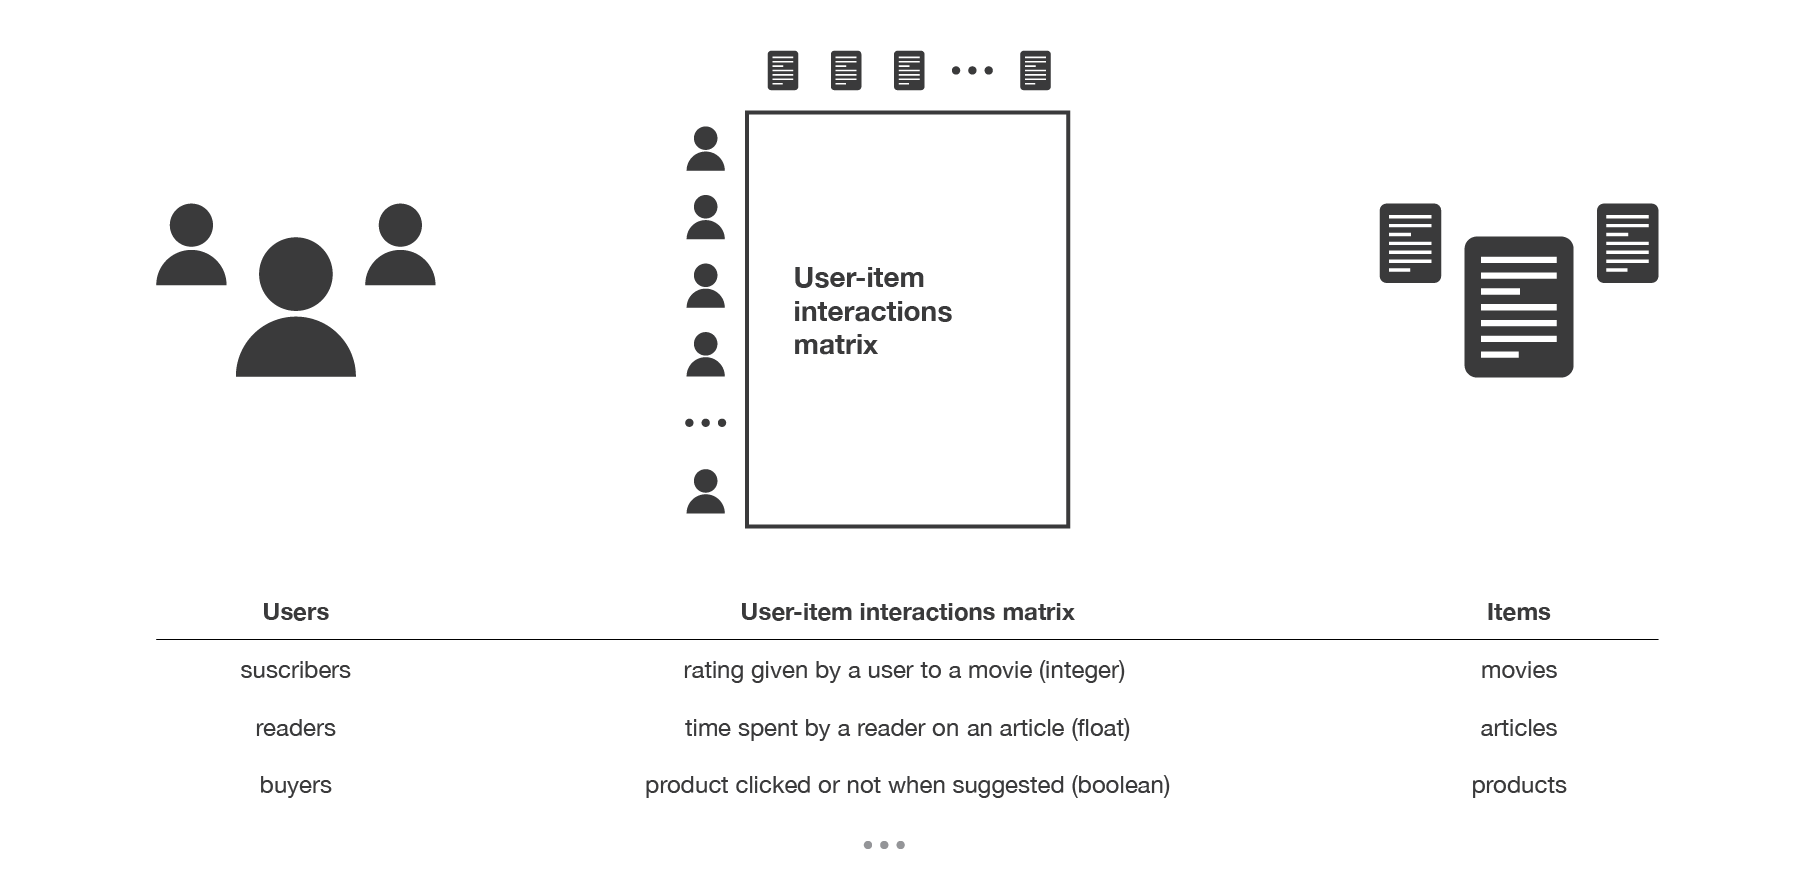

Image from: https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada

In [21]:
# Our ratings matrix in another formation:
X_train.head()

,user,item,rating,timestamp
0,A35BKARXRL7XDD,B00DBCAS7E,5.0,1397088000
1,A1BHXHZHSLYU0P,B0007Z70YM,4.0,1315785600
2,A2T3KP9PIE5D9Y,B003BVIXWW,5.0,1397260800
3,ATDXFI4YZRGOM,B003JVCA9Q,4.0,1309996800
4,A13TO1ZFAH9SVN,B00005N6K3,5.0,1099958400


**Collaborative filtering has two types of methods:**
1. Memory based
2. Model based

##### 6.2.1.1 Memory based

The memory based method will try to find similar items or similar users, according to known ratings, and with that information will try to **predict the ratings on items for users that haven't rated them**

##### 6.2.1.2 Model based

In the model based method, we use the user-item interactions to build a new model of our users and items, that represents them with a new vector that suppose to hold all the information about them.

This process is called **embedding**, and is done with an algorithm called **matrix factorization**.

#### 6.2.2 Content based models

Content based models are what they imply they are - based solely on the content (metadata) about the users and items.

In this method, we build a model that gets as input information about users and items (and **not** ratings), and predicts the rating of that user to that perticular item.

Many types of algorithms can be used in that part - Artificial neural networks, basic regressions, random forests, SVM's, etc. (Every machine learning algorithm that can take some input "X" and map it to output "Y").

#### 6.2.3 Hybrid methods

Hybrid methods are exactly what they are - hybrid. They combine both paradigms presented above: using both the user-item interactions (ratings) and the metadata (content-based) to predict a rating for a given user.

---

In our exercise, **we will try to implement all 3 paradigms: collaborative filtering, content based, and hybrid methods.**

We will describe each algorithm before using him in each one of the sections below.

---

### 6.3 Training the models

Now we finally get to the fun part - trying to find good models that fit the data and produce good recommendations.

**Yet, in this part we will not use the test set at all!** The test set will be kept aside until we finish all training and fine-tuning, to evaluate our real model performance.

##### 6.3.1 Training collaborative filtering algorithms

##### Default model - mean

Our first step in training will be to build a default performance measurment that we can compare ourself to.

In our business objective above (section 1), we've said that our company corrently simply predicts the mean score for each item not rated by a given user.

Therefore, in our usecase of 1-5 ratings range, the mean rating is 3.

For CF algorithms we will use the surprise framework, that implement most algorithms for recommendation systems that are based on collaborative filtering. In implementing content based and hybrid models, we will have to use different libraries.

In [16]:
# Imports from surprise to declare our default algorithm
from surprise import AlgoBase
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader

Now we will define our basic algorithm, that returs the mean 3.0 for each item:

In [22]:
"""
Default model that always return 3.0 - the mean score between 1 and 5. Will be used for comparisons
"""
class DefaultModel(AlgoBase):
    
    def __init__(self):
        AlgoBase.__init__(self)
        
    def estimate(self, user, item):
        # always return the mean value
        return 3.0

Now we will read our data, and define our basic model on it:

In [18]:
# define a Reader class for the data in surprise
reader = Reader(rating_scale=(1, 5))

# read the data
data = Dataset.load_from_df(df=X_train[['user', 'item', 'rating']], reader=reader)

# define the algorithm for the training
alg = DefaultModel()

NameError: name 'DefaultModel' is not defined

And implement the cross-validation technique for training (splitting the data to k sets and training on k-1 of the data, and testing on the rest, for k times):

In [24]:
cross_validate(alg, data, cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm DefaultModel on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.6939  1.6947  1.6946  1.6944  0.0004  
MAE (testset)     1.5617  1.5620  1.5623  1.5620  0.0003  
Fit time          0.00    0.36    0.33    0.23    0.16    
Test time         2.38    2.28    2.89    2.52    0.27    


{'test_rmse': array([1.69388824, 1.69468414, 1.69460436]),
 'test_mae': array([1.56166505, 1.56200425, 1.5623221 ]),
 'fit_time': (0.0, 0.35880064964294434, 0.3320019245147705),
 'test_time': (2.3770060539245605, 2.2776038646698, 2.8906259536743164)}

And we got our first results! A pretty high RMSE: **1.69 RMSE value**, very far from our goal.

Now we will move on, and implement some more interesting algorithms. **We will explain each one of them before implementing them**

---

##### Baseline estimator

The concept of baseline estimators is best explained at [Koren 2010](https://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf).

The main idea is that we are trying to calculate $b_{ui}$ which is the estimated rating of item $i$ for user $u$.

The calculation is:
$b_{ui} = \mu + b_i + b_u$, where $b_i$ and $b_u$ are the deviations of item ratings and user ratings. $\mu$ is the average value over all items.

For example: let's say that our item is the video game "Planetside 2", the average score for video games is 3.5, "Planetside 2" is rated 0.5 above ($b_i$ = 0.5), but user "u" tends to rank items 0.3 points below average ($b_u = -0.3$), therefore our estimate should be: $3.5 + 0.5 - 0.3 = 3.7$

Baselines can be estimated in two different ways: using gradient descent (SGD), or using alternating least squares (ALS).

Now we will implement this on our dataset (explanations inside the cells):

In [26]:
# import the baseline algorithm
from surprise import BaselineOnly

In [27]:
# configure the training parameters: we will choose SGD for the training method, and use the recommended settings
baseline_configuration = {
    'method': 'sgd', # SGD Algorithm
    'reg': 0.02, # default regularization
    'learning_rate': 0.005, # default learning rate
    'n_epochs': 20
}

In [28]:
# define the algorithm
baseline_alg = BaselineOnly(bsl_options=baseline_configuration)

In [29]:
# use the same data as above in the default model
cross_validate(algo=baseline_alg,
               data=data,
               cv=3,
               verbose=True)

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Evaluating RMSE, MAE of algorithm BaselineOnly on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.2599  1.2588  1.2553  1.2580  0.0020  
MAE (testset)     0.9891  0.9889  0.9866  0.9882  0.0011  
Fit time          7.87    8.06    8.06    8.00    0.09    
Test time         3.86    3.68    3.85    3.79    0.08    


{'test_rmse': array([1.25988188, 1.25877683, 1.25527781]),
 'test_mae': array([0.98906237, 0.9888808 , 0.986594  ]),
 'fit_time': (7.869164943695068, 8.060722589492798, 8.05712366104126),
 'test_time': (3.8550949096679688, 3.6766364574432373, 3.8487370014190674)}

And we already got **Huge improvement from our default benchmark - avg. RMSE of 1.25 instead of 1.69.**

---

##### k-NN algorithms (Clustering based)

Also noted at [Koren 2010](https://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf), neighborhood models are the most common approach to CF algorithms. They are based on the concept that users that rate simliarly are similar, and items that are rated similarly are similar. Therefore, this approach is divided into 2 types:
1. User-user comparison
2. Item-item comparison 

The algorithm that is applied works as follows:
1. Clusters up to k neighbours that are close to the required rating (rating of item by specific user)
2. Calcalute the ratings by weighted average by similarity of those neighbours:

$\hat{r}_{ui} = \frac{
\sum\limits_{v \in N^k_i(u)} \text{sim}(u, v) \cdot r_{vi}}
{\sum\limits_{v \in N^k_i(u)} \text{sim}(u, v)}$


The difference between user-user and item-item approaches **is whether we choose the neighbours based on the user, or based on the item** (we always look for a specific user and a specific item, and can cluster by each one of them seperately)

In [44]:
## add pictures of user, items

**Basic KNN Implementation**

We will start with basic KNN configuration. **As a reminder, we do not try to implement hyperparameter tuning in this part, but rather simply train and test many different models to decide on which one of them to focus later.**

In [30]:
# import the KNN algorithm
from surprise import KNNBasic

Configuring similarity measures:

In [31]:
# measuring by user-user distance
similarity_configuration_uu = {
    'name': 'msd', # use the mean squared
    'user_based': True # user-user comparison
}

Trying to train on user-user comparison:

In [49]:
# define on user-user
knn_basic_alg = KNNBasic(k=40,
                         min_k=1,
                         sim_options=similarity_configuration_uu)

# train on user-user data
cross_validate(algo=knn_basic_alg,
               data=data,
               cv=3,
               verbose=True)

Computing the msd similarity matrix...


MemoryError: Unable to allocate 2.63 TiB for an array with shape (600989, 600989) and data type float64

And we get a memory error error!

In order to get the similarity matrix in the size of all different users, we need to allocate 2.63 terabyte of space!

Since its not possible in any way, **we will try working with the item-item comparison instead.**

In [23]:
# measuring by item-item distance
similarity_configuration_ii = {
    'name': 'cosine', # use the cosine similarity
    'user_based': False # item-item comparison
}

In [52]:
# define now on item-item
knn_basic_alg = KNNBasic(k=40,
                         min_k=1,
                         sim_options=similarity_configuration_ii)

# train on user-user data
cross_validate(algo=knn_basic_alg,
               data=data,
               cv=3,
               verbose=True)

Computing the cosine similarity matrix...


MemoryError: Unable to allocate 15.1 GiB for an array with shape (44950, 44950) and data type float64

Now we need a smaller amount of space, but yet we need 15GB+ for this action.

We will reduce the dataset to reduce the number of items, and therefore the size of the similarity matrix.

As we've seen in the EDA, **most items have no more than a few ratings.** We will simply remove those items from our dataframe:

In [14]:
# Copy the dataframe
X_train_copy = X_train.copy()

# keep only items with more than 30 ratings
X_train_copy = X_train_copy[X_train_copy.groupby('item').user.transform('count') >= 30]

# print number of items in the dataset now
X_train_copy['item'].nunique()

7874

In [19]:
# load the smaller dataframe
smaller_data = Dataset.load_from_df(df=X_train_copy[['user', 'item', 'rating']], reader=reader)

And now we will try to train the algorithm again:

In [36]:
# define now on item-item
knn_basic_alg = KNNBasic(k=40,
                         min_k=1,
                         sim_options=similarity_configuration_ii)

# train on the smaller dataset
cross_validate(algo=knn_basic_alg,
               data=smaller_data,
               cv=3,
               verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.3851  1.3842  1.3883  1.3859  0.0017  
MAE (testset)     1.0570  1.0561  1.0594  1.0575  0.0014  
Fit time          2.67    2.94    2.91    2.84    0.12    
Test time         4.25    5.07    4.01    4.44    0.45    


{'test_rmse': array([1.38513741, 1.38417398, 1.38827009]),
 'test_mae': array([1.05695137, 1.05611662, 1.05942952]),
 'fit_time': (2.665048599243164, 2.936866044998169, 2.910006523132324),
 'test_time': (4.245177745819092, 5.0664613246917725, 4.01201319694519)}

And now **our RMSE is worse - 1.38 SCORE.**

We will try some more knn-based algorithms, and check fast if we get any improvement:

**KNN With means**

Similar to KNN Basics, but taking into account the mean ratings of each user.

In [45]:
from surprise import KNNWithMeans

Train the algorithm:

In [51]:
# define now on item-item
knn_mean_alg = KNNWithMeans(k=40,
                        min_k=1,
                        sim_options=similarity_configuration_ii)

# train on the smaller dataset
cross_validate(algo=knn_mean_alg,
               data=smaller_data,
               cv=3,
               verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.3464  1.3468  1.3466  1.3466  0.0001  
MAE (testset)     1.0363  1.0362  1.0362  1.0362  0.0001  
Fit time          3.33    3.85    3.41    3.53    0.23    
Test time         5.66    5.56    4.14    5.12    0.70    


{'test_rmse': array([1.34644776, 1.3467679 , 1.34663523]),
 'test_mae': array([1.03632117, 1.03618808, 1.0361581 ]),
 'fit_time': (3.328677177429199, 3.8494136333465576, 3.4122118949890137),
 'test_time': (5.6570725440979, 5.564011096954346, 4.135252952575684)}

We got a small improvement, but not a big one - to **1.34 RMSE**

**KNN With z-score (normalization)**

Now we will take into account the z-score normalization of each user.

In [20]:
from surprise import KNNWithZScore

In [24]:
# define now on item-item
knn_zscore_alg = KNNWithZScore(k=40,
                        min_k=1,
                        sim_options=similarity_configuration_ii)

# train on the smaller dataset
cross_validate(algo=knn_zscore_alg,
               data=smaller_data,
               cv=3,
               verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithZScore on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.3459  1.3464  1.3473  1.3465  0.0006  
MAE (testset)     1.0338  1.0338  1.0346  1.0341  0.0004  
Fit time          3.69    3.95    3.96    3.87    0.12    
Test time         4.50    4.67    4.89    4.69    0.16    


{'test_rmse': array([1.34590116, 1.34638059, 1.3473352 ]),
 'test_mae': array([1.03380838, 1.03380805, 1.03462078]),
 'fit_time': (3.6918396949768066, 3.9476089477539062, 3.962406873703003),
 'test_time': (4.500218152999878, 4.673296689987183, 4.892421245574951)}

No improvement compared to the KNN with mean - **still 1.34 RMSE**

**KNN With baseline**

Closer to the baseline model - we implement a clustering algorithm based on the baseline model - taking into account its results as well:

In [25]:
from surprise import KNNBaseline

In [26]:
# define now on item-item
knn_baseline_alg = KNNBaseline(k=40,
                        min_k=1,
                        sim_options=similarity_configuration_ii)

# train on user-user data
cross_validate(algo=knn_baseline_alg,
               data=smaller_data,
               cv=3,
               verbose=True)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.2585  1.2538  1.2587  1.2570  0.0023  
MAE (testset)     0.9606  0.9580  0.9612  0.9599  0.0014  
Fit time          5.90    6.28    6.26    6.15    0.17    
Test time         4.60    4.04    4.66    4.43    0.28    


{'test_rmse': array([1.25848023, 1.25380394, 1.2587435 ]),
 'test_mae': array([0.96058592, 0.95803974, 0.9611969 ]),
 'fit_time': (5.9042158126831055, 6.275483131408691, 6.260438680648804),
 'test_time': (4.601219415664673, 4.035212755203247, 4.66101598739624)}

Now we got a bigger improvement, and a result that is similar to our baseline model - **RMSE of 1.25**

---

##### Matrix factorization algorithms

Now we turn to the last approach of pure collaborative filtering method - which is matrix factorization.

The concept behind matrix factorization is to find two representations of matrices, one that represent the users, and one that represents the items, each one of the matrices in a much smaller dimension - in (m * k) and (n * k) dimensions respectively, as "k" is the smaller matrix size. 

Then, **the dot product of these metrices will produce the predicted rating.**

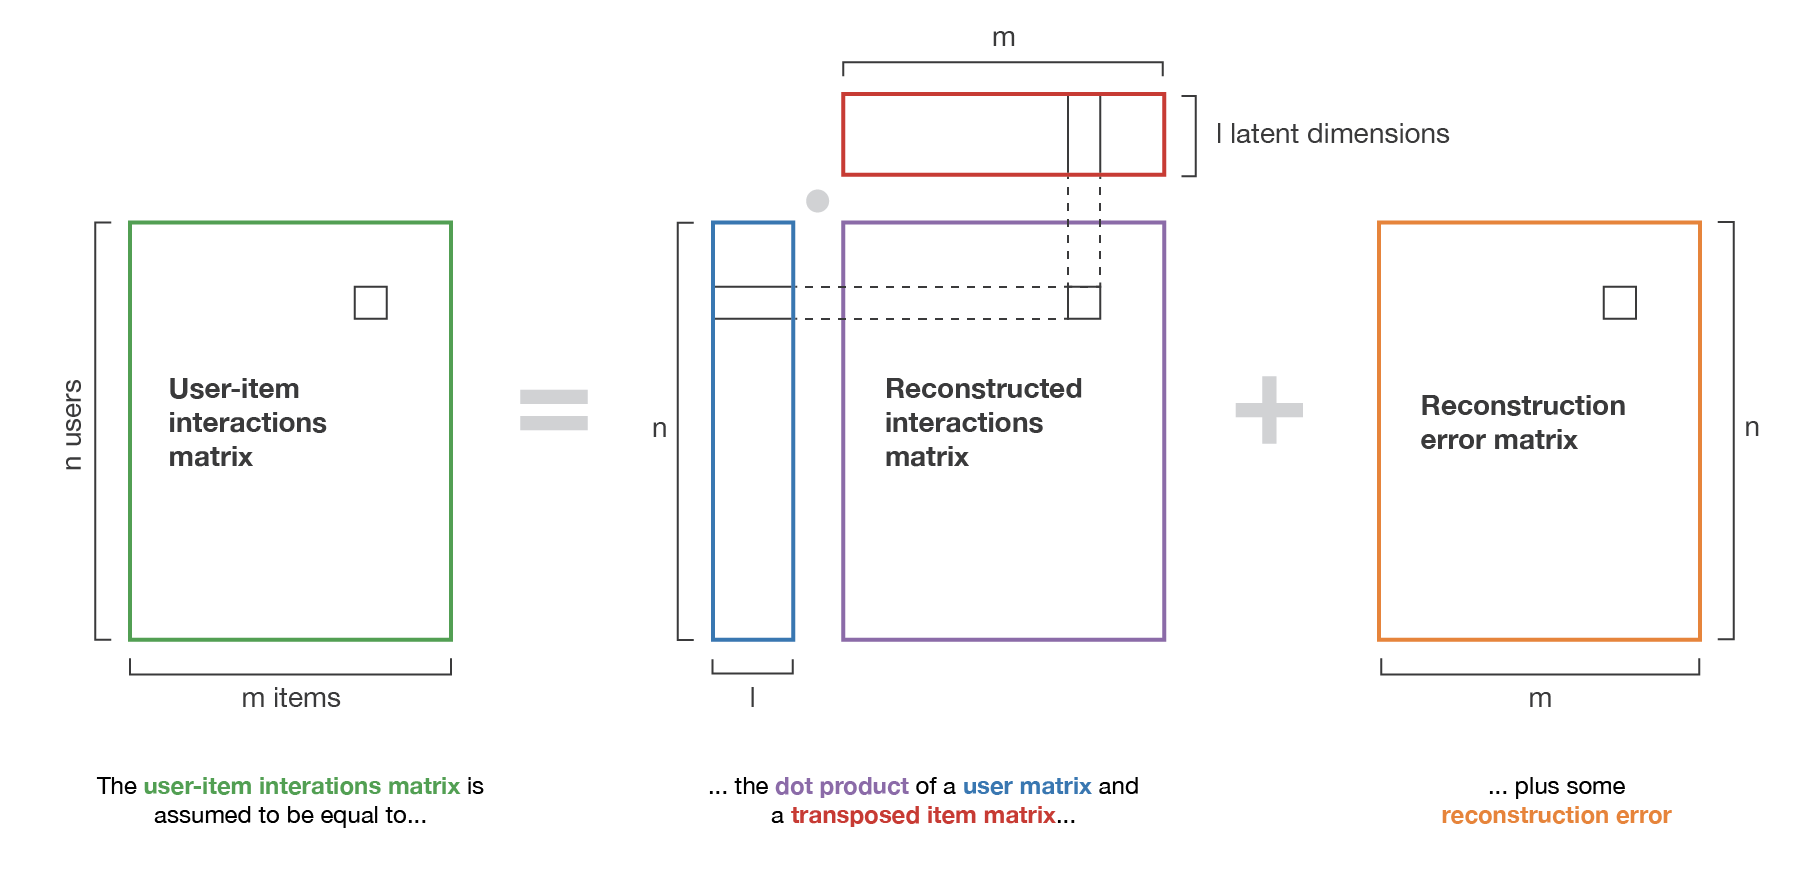

Three main types of matrix factorization algorithms exist:
1. SVD - Made popular in 2008 during the Netflix recommendation contest
2. SVD++ - Same concept as the SVD, but with improvements to the calculation
3. NMF - Based on non-negative matrix factorization

**SVD**

Starting with the SVD, the SVD predicts ratings with the following formula:

$\hat{r}_{ui} = \mu + b_u + b_i + q_i^Tp_u$

Where $q_i$ is the item vector for the specific item (from the new matrix produced for the items by the matrix factorization formula) and $p_u$ stands for the user vector

In [35]:
from surprise import SVD

In [ ]:
# Use all the default initializations
svd_alg = SVD(verbose=True)

# train on user-user data
cross_validate(algo=svd_alg,
               data=data,
               cv=3,
               verbose=True)

In [31]:
X_train_copy.shape

NameError: name 'X_train_copy' is not defined

In [75]:
X_train_copy['item'].nunique()

9149

In [71]:
X_train_copy = X_train.copy()

In [74]:
X_train_copy = X_train_copy[X_train_copy.groupby('item').user.transform('count') >= 25]

In [59]:
X_train_copy.groupby('item').user.transform('count')

0            20
1            67
2            39
3          1115
4           342
           ... 
1264733      13
1264734       5
1264735       5
1264736       5
1264737       5
Name: user, Length: 1217921, dtype: int64

In [58]:
X_train_copy

,user,item,rating,timestamp
0,A35BKARXRL7XDD,B00DBCAS7E,5.0,1397088000
1,A1BHXHZHSLYU0P,B0007Z70YM,4.0,1315785600
2,A2T3KP9PIE5D9Y,B003BVIXWW,5.0,1397260800
3,ATDXFI4YZRGOM,B003JVCA9Q,4.0,1309996800
4,A13TO1ZFAH9SVN,B00005N6K3,5.0,1099958400
...,...,...,...,...
1264733,ALQPQKQ8VS9UY,B00L2Q5KWE,1.0,1403913600
1264734,A2POHR9NC29L6H,B00L3KU0S8,2.0,1405468800
1264735,A1P76NUM2TT6IC,B00L3KU0S8,5.0,1403395200
1264736,A3RK6IJ1BLFJKX,B00L3KU0S8,5.0,1405382400


In [ ]:
X = X[X.groupby('user').user.transform('count') >= MINIMUM_RATINGS_AMOUNT]

In [64]:
X_train

,user,item,rating,timestamp
0,A35BKARXRL7XDD,B00DBCAS7E,5.0,1397088000
1,A1BHXHZHSLYU0P,B0007Z70YM,4.0,1315785600
2,A2T3KP9PIE5D9Y,B003BVIXWW,5.0,1397260800
3,ATDXFI4YZRGOM,B003JVCA9Q,4.0,1309996800
4,A13TO1ZFAH9SVN,B00005N6K3,5.0,1099958400
...,...,...,...,...
1264747,A20J2PMC9ZPD4F,B00LGBJIQ4,5.0,1405900800
1264748,A3HMVWAGUCNA1K,B00LGBJIQ4,5.0,1405987200
1264749,A14H2HEWFT7CLQ,B00LGBKSK4,5.0,1405900800
1264750,A2EHIE51TERF2C,B00LGBKSK4,5.0,1405900800


In [65]:
1217921 + 26295 - 2229

1241987

In [60]:
11098 + 6114 + 3911 + 2943 + 2229

26295

In [ ]:
item_ratings
1        11098
2         6114
3         3911
4         2943
5         2229
         ...  
5090         1
5487         1
5711         1
7392         1
16198        1
Name: item, Length: 680, dtype: int64

In [31]:
from __future__ import print_function  # for Python2
import sys

local_vars = list(locals().items())
for var, obj in local_vars:
    print(var, sys.getsizeof(obj))

__name__ 57
__doc__ 113
__package__ 16
__loader__ 16
__spec__ 16
__builtin__ 80
__builtins__ 80
_ih 344
_oh 240
_dh 72
In 344
Out 240
get_ipython 64
exit 56
quit 56
_ 4724332
__ 51
___ 51
_i 213
_ii 111
_iii 73
_i1 118
pd 80
np 80
json 80
_i2 422
videos_ratings_columns 96
videos_ratings_df 16
_i3 170
train_test_split 136
_i4 638
SPLIT_PERCENTAGE 24
X 48521650
y 23621401
_i5 289
MINIMUM_RATINGS_AMOUNT 28
_i6 400
_i7 424
X_train 194447619
X_test 9704415
_i8 114
_8 833
_i9 354
USER 63
_i10 229
videos_ratings_less_ratings_df 16
_i11 130
_i12 222
_i13 244
AlgoBase 1056
Dataset 1056
cross_validate 136
Reader 1056
_i14 307
X_train_copy 162207542
_14 28
_i15 173
_i16 244
_i17 173
_i18 296
reader 56
data 56
_i19 173
smaller_data 56
_i20 83
KNNWithZScore 1464
_i21 351
_i22 356
_i23 213
similarity_configuration_ii 240
_i24 356
knn_zscore_alg 56
_24 240
_i25 81
KNNBaseline 1464
_i26 358
knn_baseline_alg 56
_26 240
_i27 212
print_function 56
sys 80
local_vars 888
var 53
obj 213
_i28 73
_i29 111
_i3

In [26]:
del videos_ratings_df, videos_ratings_less_ratings_df, videos_metadata_df

In [29]:
%reset_selective X

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [29]:
videos_ratings_df = None
videos_ratings_less_ratings_df = None

In [32]:
import gc

In [33]:
gc.collect()

338

In [34]:
del _
gc.collect()

20

**הכנת הדאטה**

1.  אחרי הבנת הנתונים והמסקנות הראשוניותי ניישם אותן. נרשום את הכל בתוך פונקציות כדי שנשתמש 
אחכ בפייפליין אם נרצה- 4,1,2,3

2. לממש פה גם איזה קליסטור או משהו, ולהוסיף חפירה על מהו האלגוריתם, איך מימשנו, למה וכו'

**הצגת המודלים ואימון ראשוני**

1. כעת נעמיק באלגוריתמים ובאפשרויות השונות שעומדות לרשותינו
2. להסביר על שני הסוגים - סיאף וגם קונטנט בייסד וגם הייבריד.
3. לממש מכל אחד מהסוגים. פה אצטרך להעמיק מאוחר יותר באיך בדיוק לעשות את זה.
4. להסביר על סוגיית הליקייג' הפוטנציאלית במצב של שימוש במטריקס פקטוריזיישן על כל הדאטה ואז להשתמש בוקטור הזה לתוך מודל אימון

**תהליך פיינטיונינג וניתוח התוצאות**

1. מהסעיפים שרשומים בספר לעשות את 1+3
2. להכניס גם ניתוח שאפ

**הצגת הפתרון**

1. החשיבות של ויזואליזציה של הפתרון לעסק וגם ללקוח
2. הסברים כולל ניתוח שאפ כולל אולי גם מערכת אינפוט אאוטפוט בסיסית שמציגה המלצות ללקוח 

**:למחוקקקקק**

**מימוש הפייפליין**

1. עוד לחשוב על החלק הזה
2. להציג מימוש על דאטהסט אחר

**סיכום ומסקנות**

בלה בלה בלה

ובסוף, חזרה על הכל, שינויים באנגלית ומחיקת אזכור לפייפליין

**ניתוח בעיה עסקית**

1. הסיטואציה היא חברת קמעונאות גדולה שמוכרת הרבה סוגי מוצרים להרבה סוגי לקוחות. החברה מבוססת על שיטות ישנות, עם אתר אינטרנט מיושן ומעוניינת לשפר את התהליכים העסקיים שלה ואת שורת הרווח, וגם להציע חווית קנייה טובה יותר ללקוח
2. את הניתוח העסקי נחלק ל-(להעתיק את הסעיפים מהספר)
3. לחפור על הסעיפים 1,2,3,4,5,6,7,10

**השגת הנתונים**

1. כעת נעבור לדאטה. מורכב משלושה סוגים...
2. יש הרבה סוגי מוצרים, ולכן נבחר סוג אחד עשיר במידע ועליו ננתח ובו נשתמש בשביל הפייפליין של סוף הפרויקט
3. את ההשגת הנתוןניםך נחלק ל-(7,10,11)
4. לחפור על הסעיפים 

## Look at the bigger picture

### The problem statement

Many companies work with many different databases and different parameters describing 3 things:
* Their products
* Their customers
* Their product-customer relationships (aka - Ratings)

___

**Our goal:** building an end-to-end recommendation system pipeline that, given a new dataset (in a specific format), can apply the following properties on it:
1. Data preprocessing
2. Different model evaluations
3. Hyperparameters fine-tuning
4. Presenting the different model results (w. SHAP results)

**The required pipeline is as follows:**

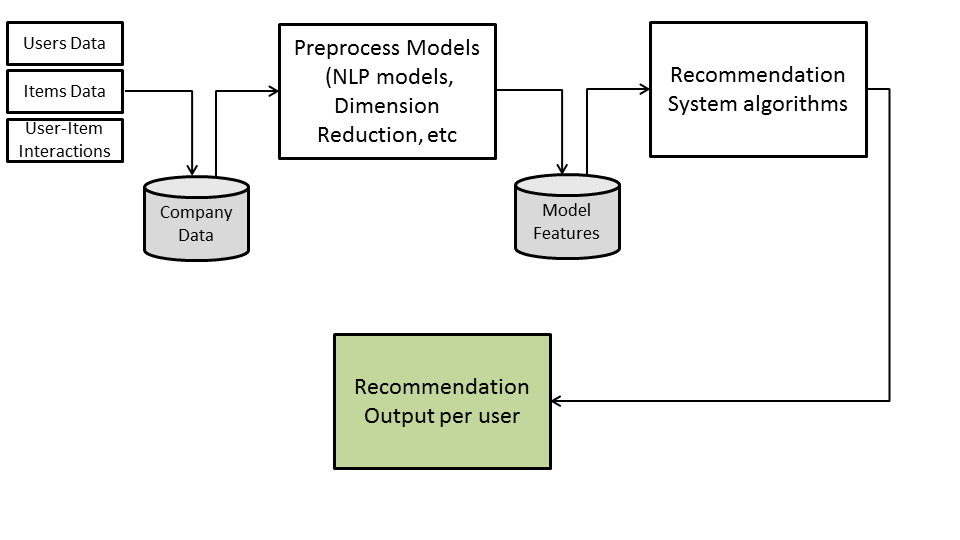

---

https://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf

https://www.bgu.ac.il/~shanigu/Publications/EvaluationMetrics.17.pdf

https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada

BOOK RECOMMENDER

BOOK INTO ML

מה עוד לנסות:
1. לנסות שימוש בדירוגים של מוצרים מסוגים אחרים לתוך הוידיאו, במקום שיש בו חפיפה טובה בין היוזרים.

צעדי המשך:
1. שימוש גם בתמונות המצורפות למטאדאטה כאוסף פיצ'רים נוסף.